<h1>
    <br style ="color:#EA7600"> UCL </br> 
    </p>
</h1>

<div>

  <h4>
      <p style="font-size:18pt">COMP0198 Machine Learning with Applications in Finance</p>
      <p style="font-size:18pt">Week 2</p>
  </h4>

</div>

# Table of Contents
* [1. Financial returns](#1.-Financial-returns)
    * [1.1 Growth and Rate of Return](#1.1-Growth-and-Rate-of-Return)
    * [1.2 Compound Interest](#1.2-Compound-Interest)
    * [1.3 Discount Factors and Depreciation](#1.3-Discount-Factors-and-Depreciation)
    * [1.4 Present Value](#1.4-Present-Value)
    * [1.5 Future Value](#1.5-Future-Value)
    * [1.6 Internal Rate of Return (IRR)](#1.6-Internal-Rate-of-Return-(IRR))
* [2. Stock market data](#2.-Stock-market-data)
    * [2.1 Plotting financial returns](#2.1-Plotting-financial-returns)
    * [2.2 Return distributions](#2.2-Return-distributions)
    * [2.3 Average Annualized Return](#2.3-Average-Annualized-Return)
    * [2.4 Standard deviation and Variance](#2.4-Standard-deviation-and-Variance)
    * [2.5 Annualizing variance](#2.5-Annualizing-variance)
    * [2.6 Skewness](#2.6-Skewness)
    * [2.7 Kurtosis](#2.7-Kurtosis)
    * [2.8 Statistical tests for normality](#2.8-Statistical-tests-for-normality)
    * [2.9 Portfolio returns](#2.9-Portfolio-returns)
    * [2.10 Equal weighted portfolios](#2.10-Equal-weighted-portfolios)
    * [2.11 Market-cap weighted portfolios](#2.11-Market-cap-weighted-portfolios)
    * [2.12 Mean-Variance Portfolio (MVP) Optimisation](#2.12-Mean-Variance-Portfolio-(MVP)-Optimisation)
        * [2.12.1 Efficient frontier](#2.12.1-Efficient-frontier)
        * [2.12.2 Sharpe Ratio](#2.12.2-Sharpe-Ratio)
    * [2.13 Regularised Portfolio Optimisation](#2.13-Regularised-Portfolio-Optimisation)
        * [2.13.1 Penalisation methods](#2.13.1-Penalisation-methods)
    * [2.14 The correlation matrix](#2.13-The-correlation-matrix)
    * [2.15 Random Walk](#2.14-Random-Walk)
        * [2.15.1 A random walk simulation in Finance](#2.14.1-A-random-walk-simulation-in-Finance)
        * [2.15.2 Monte carlo simulations](#2.14.2-Monte-carlo-simulations)
* [3. What Is Machine Learning?](#3.-What-Is-Machine-Learning?)
    * [3.1 Why Use Machine Learning?](#3.1-Why-Use-Machine-Learning?)
    * [3.2 End-to-End Machine Learning Project](#3.2-End-to-End-Machine-Learning-Project)
* [4. Linear Regression](#4.-Linear-Regression)
    * [4.1 The Normal Equation](#4.1-The-Normal-Equation)
    * [4.2 Cross-Validation](#4.2-Cross-Validation)
    * [4.3 Feature Selection](#4.3-Feature-Selection)
* [5. Gradient Descent](#5.-Gradient-Descent)
    * [5.1 Batch Gradient Descent](#5.1-Batch-Gradient-Descent)
    * [5.2 Stochastic Gradient Descent](#5.2-Stochastic-Gradient-Descent)
    * [5.3 Mini-batch gradient descent](#5.3-Mini-batch-gradient-descent)
* [6. Polynomial Regression](#6.-Polynomial-Regression)
* [7. Learning Curves](#7.-Learning-Curves)
* [8. The Bias/Variance Trade-Off](#8.-The-Bias/Variance-Trade-Off)
* [9. Regularized Linear Models](#9.-Regularized-Linear-Models)
    * [9.1 Ridge Regression](#9.1-Ridge-Regression)
    * [9.2 Lasso Regression](#9.2-Lasso-Regression)
* [10. Logistic Regression](#10.-Logistic-Regression)

> *The financial services industry has seen drastic technology-led changes over the past few years. Many executives look to their IT departments to improve efficiency and facilitate game-changing innovation—while somehow also lowering costs and continuing to support legacy systems. Meanwhile, FinTech start-ups are encroaching upon established markets, leading with customer-friendly solutions developed from the ground up and unencumbered by legacy systems.* [PwC 19th Annual Global CEO Survey 2016](https://pwc.to/1OYTO2d)

# Setup

This project requires Python 3.7 or above:

In [73]:
import sys

assert sys.version_info >= (3, 7)

Let's import the libraries we will need for this week's lab and verify that we have the correct versions:

In [74]:
# scipy
import scipy
print("scipy: %s"  % scipy.__version__)
# numpy
import numpy
print("numpy: %s"  % numpy.__version__)
# matplotlib
import matplotlib
print( "matplotlib: %s"  % matplotlib.__version__)
# pandas
import pandas
print( "pandas: %s"  % pandas.__version__)
# statsmodels
import statsmodels
print( "statsmodels: %s"  % statsmodels.__version__)
# scikit-learn
import sklearn
print( "sklearn: %s"  % sklearn.__version__)

scipy: 1.11.2
numpy: 1.24.3
matplotlib: 3.8.0
pandas: 2.1.0
statsmodels: 0.14.0
sklearn: 1.3.0


If we get an error of type: `ModuleNotFoundError`, we can install the missing library by running:

- !pip install nameOfMissingLibrary

Let's verify that we are using the version requires of Scikit-Learn ≥ 1.0.1:

In [75]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Let's define the default font sizes to make the figures prettier:

In [76]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/training_linear_models` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [77]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Before looking into linear models, we are going to work with some financial formulas to illustrate how they can be used in python:

## 1.1 Growth and Rate of Return

For example, to calculate the cumulative returns from investing $1000 in an asset that grows at 10% per year, over a 5 year period, we can use the formula:

1000∗(1+0.10)^5

which is the same as using the future value (FV) formula:
<img src="./figures/future_value_formula.svg" height="60%" width="60%">


<div class="alert alert-warning">
<b>EXERCISE 1: </b> 
    
Calculate the future value of an investment of GBP 2000 at 5% yearly over 4 years.


## 1.2 Compound Interest

Another important variable in calculating the return of an investment is the number of compounding periods, which can greatly affect compounded returns over time. The formula for compound interest calculation is:

<img src="./figures/compound_interest.svg" height="60%" width="60%">


In [78]:
# Predefined variables
initial_investment = 200
growth_periods = 5
growth_rate = 0.05

# Calculating the value for the investment compounded once per year
compound_periods_1 = 1
investment_1 = initial_investment*(1 + growth_rate / compound_periods_1)**(compound_periods_1*growth_periods)
print("Investment 1: " + str(round(investment_1, 2)))

# Calculating the value for the investment compounded quarterly
compound_periods_2 = 4
investment_2 = initial_investment*(1 + growth_rate / compound_periods_2)**(compound_periods_2*growth_periods)
print("Investment 2: " + str(round(investment_2, 2)))

# Calculating the value for the investment compounded monthly
compound_periods_3 = 12
investment_3 = initial_investment*(1 + growth_rate / compound_periods_3)**(compound_periods_3*growth_periods)
print("Investment 3: " + str(round(investment_3, 2)))

Investment 1: 255.26
Investment 2: 256.41
Investment 3: 256.67


<div class="alert alert-warning">
<b>EXERCISE 2: </b> 
    
Calculate the value for an initial investment of £100 compounded once per year with a growth rate of 2% and 20 growth periods.


## 1.3 Discount Factors and Depreciation

Unfortunately, not everything grows in value over time. In fact, many assets depreciate, or lose value over time because of their use. To simulate this, you can simply assume a negative expected rate of return in the compound interest formula. For example:

The final depreciated value of a car that costs £20,000, which declines in value by 5% per year for 15 years:

£20,000∗(1+−0.05)^{15}

and in python, it would look like:

In [79]:
# Calculate the future value
initial_investment = 20000
growth_rate = -0.05
growth_periods = 15

future_value = initial_investment*(1 + growth_rate)**(growth_periods)
print("Future value: " + str(round(future_value, 2)))

# Calculate the discount factor
discount_factor = 1/((1 + growth_rate)**(growth_periods))
print("Discount factor: " + str(round(discount_factor, 2)))

# Derive the initial value of the investment
initial_investment_again = future_value*discount_factor
print("Present/initial value: " + str(round(initial_investment_again, 2)))

Future value: 9265.82
Discount factor: 2.16
Present/initial value: 20000.0


## 1.4 Present Value

<img src="./figures/present_value_formula.svg" height="60%" width="60%">

The library **`numpy_financial`** built on top of `numpy`, which we saw in the last lesson, contains many functions which will make your life much easier when working with financial values.

For example, the  function `.pv(rate, nper, pmt, fv)`, with similar syntax to the function in MS Excel, allows you to calculate the present value of an investment with a few simple parameters:

- `rate`: The rate of return of the investment
- `nper`: The lifespan of the investment
- `pmt`: The (fixed) payment at the beginning or end of each period (which is 0 in our example)
- `fv`: The future value of the investment

You can use this formula in many ways. For example, you can calculate the present value of future investments in today's currency.

In [80]:
import numpy_financial as npf

# Calculate investment_1
investment_1 = npf.pv(rate=0.03, nper=15, pmt=0, fv=10000)

# Note that the present value returned is negative, so we multiply the result by -1
print("Investment 1 is worth " + str(round(-investment_1, 2)) + " in today's currency")

# Calculate investment_2
investment_2 = npf.pv(rate=0.05, nper=10, pmt=0, fv=10000)
print("Investment 2 is worth " + str(round(-investment_2, 2)) + " in today's currency")

Investment 1 is worth 6418.62 in today's currency
Investment 2 is worth 6139.13 in today's currency


## 1.5 Future Value

<img src="./figures/future_value_formula.svg" height="60%" width="60%">

The numpy_financial module also contains a function to calculate future value:

**`.fv(rate, nper, pmt, pv)`**, which allows you to calculate the future value of an investment as before with a few simple parameters:

- `rate`: The rate of return of the investment
- `nper`: The lifespan of the investment
- `pmt`: The (fixed) payment at the beginning or end of each period (which is 0 in our example)
- `pv`: The present value of the investment

It is important to note that in this function call, you must pass a negative value into the `pv` parameter if it represents a negative cash flow (cash going out). In other words, if you were to compute the future value of an investment, requiring an up-front cash payment, you would need to pass a negative value to the pv parameter in the `.fv(`) function.

In [81]:
import numpy_financial as npf

# Calculate investment_1
investment_1 = npf.fv(rate=0.05, nper=15, pmt=0, pv=-10000)
print("Investment 1 will yield a total of $" + str(round(investment_1, 2)) + " in 15 years")

# Calculate investment_2
investment_2 = npf.fv(rate=0.08, nper=15, pmt=0, pv=-10000)
print("Investment 2 will yield a total of $" + str(round(investment_2, 2)) + " in 15 years")

Investment 1 will yield a total of $20789.28 in 15 years
Investment 2 will yield a total of $31721.69 in 15 years


### 1.5.1 Adjusting Future Values for Inflation

We can use both the `.fv()` and `.pv()` functions to arrive at the projected value of a given investment in today's currency, adjusted for inflation.

In [82]:
import numpy_financial as npf

# Calculate investment_1
investment_1 = npf.fv(rate=0.08, nper=10, pmt=0, pv=-10000)
print("Investment 1 will yield a total of £" + str(round(investment_1, 2)) + " in 10 years")

# Calculate investment_2
investment_1_discounted = npf.pv(rate=0.03, nper=10, pmt=0, fv=investment_1)
print("After adjusting for inflation, investment 1 is worth £" + str(round(-investment_1_discounted, 2)) + " in today's money")

Investment 1 will yield a total of £21589.25 in 10 years
After adjusting for inflation, investment 1 is worth £16064.43 in today's money


## 1.6 Internal Rate of Return (IRR)

<img src="./figures/internal_rate_of_return.svg" height="60%" width="60%">

The **`Internal Rate of Return`** is the discount rate that makes the **`net present value (NPV)`** of a project zero. To compare differente projects and decide over which to take, their cash flow projections are used to calculate the IRR to find the most beneficial for you in terms of yield (rate of return).

To calculate the internal rate of return for each project, you can use `.irr(values)` where values are a [`numpy array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) of the cash flows for a project.

For example, to compare two projects
- a project with an initial investment of £100,000 in year 1 and cash flows of 100, 150, 250, 300, 350, 450, 500, 550, 600 from year 2 to 10
- second project with the same initial investment of £100,000 in year 1 and cash flows of 150, 250, 350, 375, 425, 550, 575, 600, 650 would be compared using the IRR of each:

In [83]:
import numpy as np

# Create a numpy array of cash flows for Project 1
project_1 = np.array([-1000,100, 150, 250, 300, 350, 450, 500, 550, 600])

# Create a numpy array of cash flows for Project 2
project_2 = np.array([-1000,150, 250, 350, 375, 425, 550, 575, 600, 650])

In [84]:
import numpy_financial as npf

# Calculate the internal rate of return for Project 1
irr_project1 = npf.irr(project_1)
print("Project 1 IRR: " + str(round(100*irr_project1, 2)) + "%")

# Calculate the internal rate of return for Project 2
irr_project2 = npf.irr(project_2)
print("Project 2 IRR: " + str(round(100*irr_project2, 2)) + "%")

Project 1 IRR: 23.38%
Project 2 IRR: 30.26%


After calculating the IRR for both projects, the next step is deciding which one you would prefer based on your desired IRR. Since IRR signals the rate of growth expected from an investment based on its cash flows, the higher the IRR for a project, the most desirable that project is.

# 2. Stock market data

We are going to use the [unofficial Yahoo Finance! python library](https://pypi.org/project/yfinance/) that uses Yahoo's publicly available APIs to get some datasets to work in some examples. 

- First, install the needed packages:
            
            pip install yfinance numpy pandas matplotlib

Now that yfinance is install, let's get the *End of the Day* Data stock data for Microsoft from the primary listing on NASDAQ, AMEX, NYSE and ARCA. The ticker symbol is `MSFT`:

In [85]:
import yfinance as yf

# Get the data for the stock MSFT
StockPrices = yf.download('MSFT','2012-10-02','2022-09-30')

# Correct column names and sort by Date
StockPrices.columns = [c.title().replace(" ", "_") for c in StockPrices.columns]

# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')

# Print only the first five rows of StockPrices
StockPrices.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2012-10-02,29.680000,29.889999,29.500000,29.660000,24.093094,43338900
2012-10-03,29.750000,29.990000,29.670000,29.860001,24.255550,46655900
2012-10-04,29.969999,30.030001,29.570000,30.030001,24.393642,43634900
2012-10-05,30.230000,30.250000,29.740000,29.850000,24.247423,41133900
2012-10-08,29.639999,29.920000,29.549999,29.780001,24.190565,29752000


## 2.1 Plotting financial returns

The dataframe with the data that we got from quandl included daily Open, High, Low, Close, Adjusted Close, and Volume data, often referred to as OHLCV data.

The Adjusted Close column is the most important. It is normalized for stock splits, dividends, and other corporate actions, and is a true reflection of the return of the stock over time. You will be using the adjusted close price to calculate the returns of the stock in this exercise.

                 Open       High        Low      Close  Adj_Close    Volume  \
Date                                                                          
2012-10-02  29.680000  29.889999  29.500000  29.660000  24.093094  43338900   
2012-10-03  29.750000  29.990000  29.670000  29.860001  24.255550  46655900   
2012-10-04  29.969999  30.030001  29.570000  30.030001  24.393642  43634900   
2012-10-05  30.230000  30.250000  29.740000  29.850000  24.247423  41133900   
2012-10-08  29.639999  29.920000  29.549999  29.780001  24.190565  29752000   

             Returns  
Date                  
2012-10-02       NaN  
2012-10-03  0.006743  
2012-10-04  0.005693  
2012-10-05 -0.005994  
2012-10-08 -0.002345  


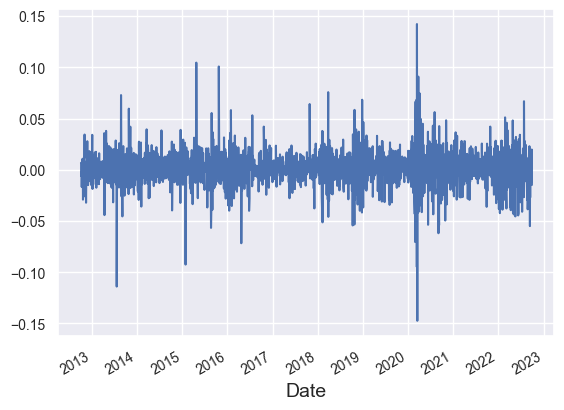

In [86]:
import matplotlib.pyplot as plt

# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adj_Close'].pct_change()

# Check the first five rows of StockPrices
print(StockPrices.head())

# Plot the returns column over time
StockPrices['Returns'].plot()
plt.show()

## 2.2 Return distributions

In order to analyze the probability of outliers in returns, it is helpful to visualize the historical returns of a stock using a histogram.

You can use the histogram to show the historical density or frequency of a given range of returns. Note the outliers on the left tail of the return distribution are what you often want to avoid, as they represent large negative daily returns. Outliers on the right hand side of the distribution are normally particularly good events for the stock such as a positive earnings surprise.

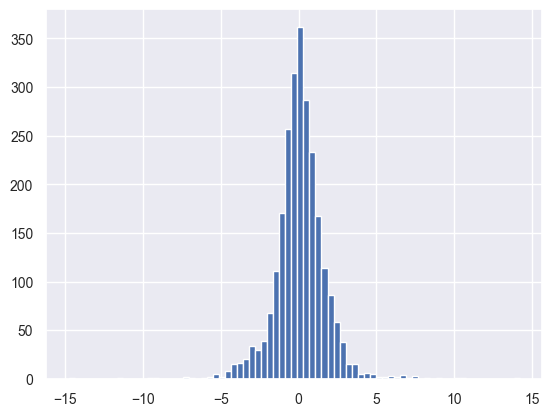

In [87]:
import matplotlib.pyplot as plt

# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, bins=75,density=False)
plt.show()

## 2.3 Average Annualized Return

You can calculate the average historical return of a stock by using numpy's mean() function.

When you are calculating the average daily return of a stock, you are essentially estimating the first moment ( μ ) of the historical returns distribution.

But what use are daily return estimates to a long-term investor? You can use the formula below to estimate the average annual return of a stock given the average daily return and the number of trading days in a year (typically there are roughly 252 trading days in a year):

Average Annualized Return=((1+μ)^252)−1
The StockPrices object from the previous exercise is stored as a variable.

In [88]:
# Import numpy as np
import numpy as np

# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print(mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print(mean_return_annualized)

0.001046004115056881
0.3014190855276182


### Implied rate for annualized return

We can compare the result above from using **means** to the real implied rate by looking at how much our returns are if we bought a single share of MSFT in 2012-10-02 and hold it until 2022-09-30.

*Note, the Implied rate = (forward / spot) raised to the power of (1 / time) - 1

In [89]:
initial_price = StockPrices.iloc[0]['Adj_Close']
start_date = StockPrices.iloc[0].name.strftime('%Y-%m-%d')
final_price = StockPrices.iloc[-1]['Adj_Close']
end_date = StockPrices.iloc[-1].name.strftime('%Y-%m-%d')

print("The initial price of the stock was $" + str(round(initial_price, 2)) + " on " + str(start_date))
print("The final price of the stock was $" + str(round(final_price, 2)) + " on " + str(end_date))

The initial price of the stock was $24.09 on 2012-10-02
The final price of the stock was $235.23 on 2022-09-29


In [90]:
avg_annual_return = (final_price/initial_price)**(1/10)-1
print("The average annual return of the stock was " + str(round(100*avg_annual_return, 2)) + "%")

The average annual return of the stock was 25.59%


The average daily return of Microsoft's stock (mu) is 0.0094% per day. The average annualized return is an impressive 30.14% per year while the 10 years implied annual rate is 25.59% based on a [calculation for a range of 10 year of Microsoft stock performance](https://www.netcials.com/stock-10-year-history/MSFT-Microsoft-Corporation/).

## 2.4 Standard deviation and Variance

Risk can be measured in many ways, while the volatility as measured by the **standard deviation** of the rates of return is probably the most common measure. The standard deviation formula is:

$$
\sigma={\sqrt {\frac {\sum(x_{i}-{\mu})^{2}}{N}}}
$$

- $\sigma$	= 	population standard deviation
- N	= 	the size of the population
- $x_i$	= 	each value from the population
- $\mu$	= 	the population mean

Just like you estimated the first moment of the returns distribution in the last exercise, you can can also estimate the second moment, or variance of a return distribution using numpy.

In this case, you will first need to calculate the daily standard deviation ( σ ), or volatility of the returns using `np.std()`. The variance is simply:

$\sigma^2$

In [91]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print(sigma_daily)

# Calculate the daily variance
variance_daily = sigma_daily**2
print(variance_daily)

0.01668001277089357
0.00027822282603717254


The average daily volatility of the stock (sigma) is 1.67% per day. The average daily variance of the stock is 0.02782%.

## 2.5 Annualizing variance

You can't annualize the variance in the same way that you annualized the mean.

In this case, you will need to multiply `σ` by the square root of the number of trading days in a year. There are typically 252 trading days in a calendar year. Let's assume this is the case for this exercise.

This will get you the annualized volatility, but to get annualized variance, you'll need to square the annualized volatility just like you did for the daily calculation.

In [92]:
# Annualize the standard deviation
sigma_annualized = sigma_daily*np.sqrt(252)
print(sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print(variance_annualized)

0.26478699394299465
0.07011215216136749


There is an annualized volatility (sigma) of 26.48% per year and an annualized variance of 7.01% per year

## 2.6 Skewness

To calculate the third moment, or skewness of a returns distribution in Python, you can use the `skew()` function from `scipy.stats`.

Remember that a negative skew is a right-leaning curve, while positive skew is a left-leaning curve. In finance, you would tend to want positive skewness, as this would mean that the probability of large positive returns is unusually high, and the negative returns are more closely clustered and predictable.

StockPrices from the previous exercise is available in your workspace.

In [93]:
import yfinance as yf

# Get the data for the stock MSFT
StockPrices = yf.download('MSFT','2014-11-01','2017-12-28')

# Correct column names and sort by Date
StockPrices.columns = [c.title().replace(" ", "_") for c in StockPrices.columns]

# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')

# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adj_Close'].pct_change()

# Print only the first five rows of StockPrices
StockPrices.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj_Close,Volume,Returns
Date,,,,,,,
2014-11-03,46.889999,47.459999,46.730000,47.439999,40.866570,23130400,NaN
2014-11-04,47.299999,47.730000,47.250000,47.570000,40.978558,21530800,0.002740
2014-11-05,47.799999,47.900002,47.259998,47.860001,41.228367,22449600,0.006096
2014-11-06,47.860001,48.860001,47.790001,48.700001,41.951969,33037800,0.017551
2014-11-07,48.919998,48.919998,48.290001,48.680000,41.934738,28000600,-0.000411


In [94]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns = StockPrices['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print(returns_skewness)

0.538369579417253


if we calcualte the skewness for our dataset only from 2014-11-01 to 2017-12-28 of MSFT returns, the skewness of the stock returns is 0.54. A normal distribution would have a skewness much closer to 0. To have a dataset closer to the mean, we can increase our sample based on the central limit theorem:

> if we take a sample of size n from a population whose elements have mean μ and standard deviation σ then the sample mean X‾ will have mean μ and standard deviation σ/n. - [Sheldon M. Ross, in Introductory Statistics (Fourth Edition), 2017](https://www.sciencedirect.com/topics/mathematics/central-limit-theorem)

So, let's increase our dataset by getting data for a wider date range and let's calculate again our skewness:

In [95]:
import yfinance as yf

# Get the data for the stock MSFT
StockPrices = yf.download('MSFT','2012-10-02','2022-09-30')

# Correct column names and sort by Date
StockPrices.columns = [c.title().replace(" ", "_") for c in StockPrices.columns]

# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')

# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adj_Close'].pct_change()

# Print only the first five rows of StockPrices
StockPrices.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj_Close,Volume,Returns
Date,,,,,,,
2012-10-02,29.680000,29.889999,29.500000,29.660000,24.093081,43338900,NaN
2012-10-03,29.750000,29.990000,29.670000,29.860001,24.255547,46655900,0.006743
2012-10-04,29.969999,30.030001,29.570000,30.030001,24.393637,43634900,0.005693
2012-10-05,30.230000,30.250000,29.740000,29.850000,24.247423,41133900,-0.005994
2012-10-08,29.639999,29.920000,29.549999,29.780001,24.190565,29752000,-0.002345


In [96]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns_large = StockPrices['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness_large = skew(clean_returns_large)
print(returns_skewness_large)

-0.015567934786973178


In [97]:
returns_skewness_large * 100

-1.5567934786973179

The skewness of the stock returns is -1.5567. A normal distribution would have a skewness much closer to 0. Our larger dataset for end of the day stock price for MSFT is closer to 0 than the other dataset for the data range 2014-11-01 to 2017-12-28. Still, we cannot conclude that the larger dataset is normally distributed. So, let's validate this in the next part

## 2.7 Kurtosis

Finally, to calculate the fourth moment of a distribution, you can use the `kurtosis()` function from `scipy.stats`.

Note that this function actually returns the excess kurtosis, not the 4th moment itself. In order to calculate kurtosis, simply add 3 to the excess kurtosis returned by `kurtosis()`.

clean_returns from the previous exercise is available in your workspace.

In [98]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print(excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis+3
print(fourth_moment)

10.848129659773369
13.848129659773369


The kurtosis of the stock returns is 13.87 with an excess kurtosis of 10.87. A normal distribution would tend to have a kurtosis of 3, and an excess kurtosis of 0. Let's try with our larger dataset:

In [99]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns_large)
print(excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis+3
print(fourth_moment)

9.142339045295133
12.142339045295133


According to the results above, neither the small dataset or the larger dataset seem to be normally distributed, but to be completely sure, let's try an statistical test

## 2.8 Statistical tests for normality

In order to truly be confident in your judgement of the normality of the stock's return distribution, you will want to use a true statistical test rather than simply examining the kurtosis or skewness.

You can use the `shapiro()` function from `scipy.stats` to run a Shapiro-Wilk test of normality on the stock returns. The function will return two values in a list. The first value is the t-stat of the test, and the second value is the p-value. You can use the p-value to make a judgement about the normality of the data. If the p-value is less than or equal to 0.05, you can safely reject the null hypothesis of normality and assume that the data are non-normally distributed.

In [100]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: ShapiroResult(statistic=0.8874163031578064, pvalue=1.4278527534906874e-23)
P-value:  1.4278527534906874e-23


The p-value is less than 0.05, so the null hypothesis of normality is rejected for the small dataset. The data does not have a normal distribution. Let's try wit the larger dataset:

In [101]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns_large)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: ShapiroResult(statistic=0.9143797159194946, pvalue=1.6111745719765195e-35)
P-value:  1.6111745719765195e-35


The p-value is less than 0.05, so the null hypothesis of normality is rejected for the large dataset. We can state with 95% confidence that the two datasets does not fit the normal distribution

## 2.9 Portfolio returns

If you have a portfolio of stocks where the distribution or weights for your different stocks is as follows:
- 15% Apple (AAPL)
- 20% General Electric (GE)
- 35% IBM (IBM).
- 10% Coca Cola (KO)
- 20% Microsoft (MSFT)


You can calculate the returns for your portfolio by multiplying the weights with the annualized returns for those stocks:
- First, let's get the stock information for our assets
- Average Annualized Return
- Calculate the weighted returns

In [102]:
import yfinance as yf

# Get the data for the stocks
StockPrices = yf.download('AAPL MSFT GE KO IBM','2012-10-02','2022-09-30')

# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')

# Print only the first five rows of StockPrices
StockPrices.head()

[*********************100%%**********************]  5 of 5 completed


Adj Close                                                \
                 AAPL          GE         IBM         KO       MSFT   
Date                                                                  
2012-10-02  20.133125  109.782799  130.232834  27.162628  24.093092   
2012-10-03  20.441837  110.360886  130.648666  27.091787  24.255552   
2012-10-04  20.300266  110.553558  130.574158  27.155542  24.393641   
2012-10-05  19.867657  111.372475  130.698273  27.332664  24.247421   
2012-10-08  19.428646  110.409081  130.220383  27.332664  24.190563   

                Close                                                ...  \
                 AAPL          GE         IBM         KO       MSFT  ...   
Date                                                                 ...   
2012-10-02  23.618214  136.852219  200.611862  38.340000  29.660000  ...   
2012-10-03  23.980356  137.572815  201.252396  38.240002  29.860001  ...   
2012-10-04  23.814285  137.813004  201.137665  38.330002  30.030001  ...   
2012-10-05  23.306786  138.833847  201.328873  38.580002  29.850000  ...   
2012-10-08  22.791786  137.632858  200.592728  38.580002  29.780001  ...   

                 Open                                                \
                 AAPL          GE         IBM         KO       MSFT   
Date                                                                  
2012-10-02  23.636070  137.692902  201.682602  38.560001  29.680000   
2012-10-03  23.745001  137.272568  200.707458  38.320000  29.750000   
2012-10-04  23.973213  137.813004  201.032501  38.459999  29.969999   
2012-10-05  23.757143  138.353455  201.864243  38.490002  30.230000   
2012-10-08  23.102858  137.332611  200.783936  38.540001  29.639999   

               Volume                                        
                 AAPL       GE      IBM        KO      MSFT  
Date                                                         
2012-10-02  627992400  7543376  3473766  10276000  43338900  
2012-10-03  424281200  5483733  3339146  13637100  46655900  
2012-10-04  370725600  6718586  3093545   9654500  43634900  
2012-10-05  594006000  6380181  2989886  12287900  41133900  
2012-10-08  637994000  4030392  2073800   9434600  29752000  

[5 rows x 30 columns]

In [103]:
# Calculate the daily returns of the adjusted close price
StockReturns = StockPrices['Adj Close'].pct_change()

# Print only the first five rows of StockReturns
StockReturns.head()

,AAPL,GE,IBM,KO,MSFT
Date,,,,,
2012-10-02,NaN,NaN,NaN,NaN,NaN
2012-10-03,0.015334,0.005266,0.003193,-0.002608,0.006743
2012-10-04,-0.006926,0.001746,-0.000570,0.002353,0.005693
2012-10-05,-0.021311,0.007407,0.000951,0.006523,-0.005994
2012-10-08,-0.022097,-0.008650,-0.003656,0.000000,-0.002345


Let's remember the weights that we are assigning to each stock:

- 15% Apple (AAPL)
- 20% General Electric (GE)
- 35% IBM (IBM).
- 10% Coca Cola (KO)
- 20% Microsoft (MSFT)

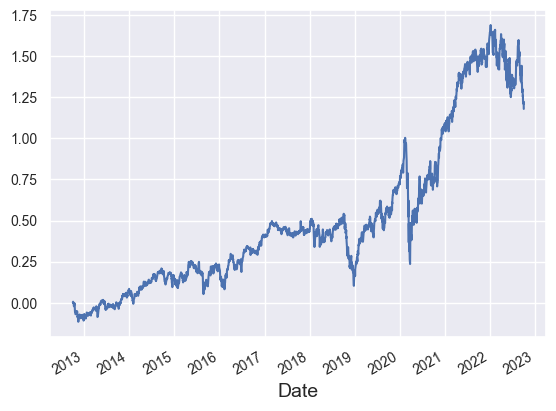

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.15, 0.20, 0.35, 0.10, 0.20])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

# Calculate the portfolio returns
InitialPortfolio = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+InitialPortfolio).cumprod()-1)
CumulativeReturns.plot()
plt.show()

## 2.10 Equal weighted portfolios

Compare your portfolio performance versus a naive equally-weighted portfolio. If the portfolio doesn't outperform a simple equally weighted portfolio, you might want to consider another strategy, or simply opt for the naive approach if all else fails. 

Equally-weighted portfolios tend to outperform the market when the largest companies are doing poorly. This is because even tiny companies would have the same weight in your equally-weighted portfolio as Apple or Amazon, for example.

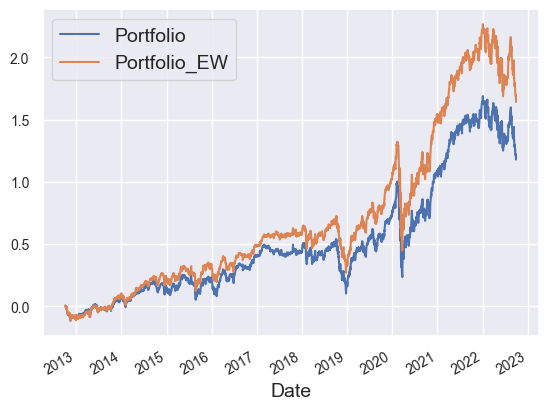

In [105]:
# Number of stocks in the portfolio
numstocks = 5

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
CumulativeReturns_EW = StockReturns.iloc[:,0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
CumulativeReturns_EW = ((1+CumulativeReturns_EW).cumprod()-1)

CumulativeReturns.plot(label='Portfolio')
CumulativeReturns_EW.plot(label='Portfolio_EW')

plt.legend()

plt.show()

## 2.11 Market-cap weighted portfolios

When large companies are doing well, market capitalization, or "market cap" weighted portfolios tend to outperform. For example, S&P 500 Index is a market-cap weighted portfolio known for its consistent returns in long periods of time.

The market capitalization (in Billions) for the 5 stocks in our portofolio in 2018:
- Apple (AAPL): 1073
- General Electric (GE): 63.35
- IBM (IBM): 101.18
- Coca Cola (KO): 202.096
- Microsoft (MSFT): 779.7

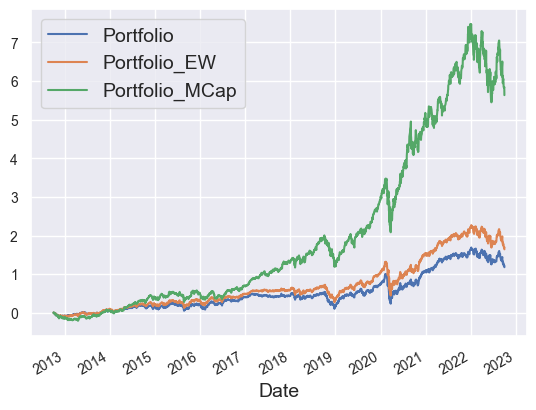

In [106]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([1073, 63.35, 101.18, 202.096, 779.7])

# Calculate the market cap weights
mcap_weights = market_capitalizations/sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
# slicing the first five columns of data frame with all rows StockReturns.iloc[:, 0:5]
CumulativeReturns_MCap = StockReturns.iloc[:, 0:5].mul(mcap_weights, axis=1).sum(axis=1)
CumulativeReturns_MCap = ((1+CumulativeReturns_MCap).cumprod()-1)

CumulativeReturns.plot(label='Portfolio')
CumulativeReturns_EW.plot(label='Portfolio_EW')
CumulativeReturns_MCap.plot(label='Portfolio_MCap')

plt.legend()

plt.show()

## 2.12 Mean-Variance Portfolio (MVP) Optimisation

> *As an empirical domain, finance is aimed at specific answers, such as an appropriate value for a given security, or an optimal number of its shares to hold.* - Darrell Duffie (1988)

A major breakthrough in finance has been the formalization and quantification of portfolio investing through the **mean-variance portfolio theory (MVP)** as pioneered by Markowitz (1952). To some extent this approach can be considered to be the beginning of quantitative finance, initiating a trend that brought more and more mathematics to the financial field.

MVP reduces a financial asset to the first and second moment of its returns, namely the mean as the expected rate of return and the variance of the rates of return or the volatility, defined as the standard deviation of the rates of return. Although the approach is generally called “mean-variance,” it is often the combination “mean-volatility” that is used.

So, MVP optimisation would allow us to find the optimal weights that minimises our risk (Variance) while maximazing our expected returns (Mean). Let's remember the weights that we are assigning to each stock in our Weighted Portfolio:

- 15% Apple (AAPL)
- 20% General Electric (GE)
- 35% IBM (IBM).
- 10% Coca Cola (KO)
- 20% Microsoft (MSFT)

Let's start by calculating the Portfolio Variance. $$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$

Here, $w_i$ and $w_j$ denote weights of all assets from 1 to n (in our case from 1 to 4) and $COV(R_i, R_j)$ is the covariance of the two assets denoted by i and j.

The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

In [107]:
# Finish defining the portfolio weights
portfolio_weights = {'AAPL': 0.15, 'MSFT': 0.20, 'GE': 0.35, 'KO': 0.10, 'IBM': 0.20}

# Calculate the covariance matrix
cov_matrix  = StockReturns.cov()

# Calculate the portfolio variance
PortfolioVariance = cov_matrix.mul(portfolio_weights, axis=0).mul(portfolio_weights, axis=1).sum().sum()

print("Daily Portfolio Variance:", PortfolioVariance)

Daily Portfolio Variance: 0.0001716453477604102


Let's calculate the weights that give us maximum expected returns. The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio:

$$
E(R_{p})=\sum \limits_{i=1}^n w_i E(R_i)
$$

- $E(R_{p})$	= 	expected portfolio return
- $E$ = Expected return for an asset
- $A_i$	= 	Asset i
- $W_i$	= 	Weight for asset i

The equation above could be re-written as:

$$
E(R_{p}) = w_1E_1 + w_2E_2 + w_3E_3 \cdots + w_nE_n
$$

In [108]:
# Convert returns to yearly frequency
StockReturns_annual = StockPrices['Adj Close'].resample('Y')

# Get the last business day of each year
StockReturns_annual = StockReturns_annual.last()

# Calculate the mean annual returns
StockReturns_annual = StockReturns_annual.pct_change()
StockReturns_annual_mean = StockReturns_annual.mean()

StockReturns_mean = StockReturns.mean()

# Portfolio returns
PortfolioReturns = StockReturns_mean.mul(list(portfolio_weights.values()), axis=0).sum()
print("Annual Expected Portfolio Returns:", PortfolioReturns)

Annual Expected Portfolio Returns: 0.00038608874789971897


Let's calculate the volatility or standard deviation of portfolio:

In [109]:
# We multiply by 252 because there are 252 trading days per year.
PortfolioStd = StockReturns.std()

print("Portfolio Std:", PortfolioStd)

print("Daily Portfolio Std:", PortfolioStd / np.sqrt(252))

Portfolio Std: AAPL    0.018214
GE      0.020960
IBM     0.014677
KO      0.011352
MSFT    0.016683
dtype: float64
Daily Portfolio Std: AAPL    0.001147
GE      0.001320
IBM     0.000925
KO      0.000715
MSFT    0.001051
dtype: float64


#### 2.12.1 Efficient frontier

The efficient frontier is the set of portfolios that offer the highest expected return for a given level of risk. The efficient frontier will help us in measuring/visualising the risk vs returns to select the most optimum portfolio to invest into after considering our risk tolerance.

The efficient frontier is a curve that shows the optimal portfolios that offer the highest expected return for a given level of risk. The efficient frontier will help us in measuring/visualising the risk vs returns to select the most optimum portfolio to invest into after considering our risk tolerance:

If $w$ is the weight vector of stocks with expected returns $\mu$, then the portfolio return is equal to each stock’s weight multiplied by its return, i.e $w^T\mu$. The portfolio risk in terms of the covariance matrix $Σ$ is given by $w^T\sum w$. 

Portfolio optimization can then be regarded as a convex optimization problem, and a solution can be found using quadratic programming. If we denote the target return as $\mu∗$, the precise statement of the long-only portfolio optimization problem is as follows:

$$
\text{minimise w subject to:} \\
w^T\sum w \\
w^T\mu \geq \mu^* \\
w^T 1 = 1 \\ 
w_i \geq 0
$$

If we vary the target return, we will get a different set of weights (i.e a different portfolio) – the set of all these optimal portfolios is referred to as the efficient frontier:

<img src="./figures/efficient_frontier.png" height="60%" width="60%">

In [110]:
import pandas as pd

# Creating a table for visualising returns and volatility of assets
assets = pd.concat([StockReturns_annual_mean, PortfolioStd], axis=1)

assets.columns = ['Returns', 'Volatility'] # Renaming the columns

assets

,Returns,Volatility
AAPL,0.287716,0.018214
GE,-0.007453,0.020960
IBM,0.008132,0.014677
KO,0.080554,0.011352
MSFT,0.294806,0.016683


Using our initial weights, Microsoft has the highest expected return, but also a high volatility. GE has the lowest expected return and a considerably high volatility. The efficient frontier is a curve that connects the portfolios with the highest expected return for each level of risk. Before we can plot the efficient frontier, let's calculate the expected returns and standard deviations for different portfolio weights:

In [111]:
# Calculate the daily returns of the adjusted close price
StockReturns = StockPrices['Adj Close'].pct_change()

portfolio_retuns = []
portfolio_volatility = []
portfolio_weights = []
number_of_stocks = len(assets.index)

# Calculate the covariance matrix
cov_matrix  = StockReturns.cov()

num_portfolios = 10000

for portfolio in range(num_portfolios):

    # Generate random weights
    weights = np.random.random(number_of_stocks)

    # Rebalance the weights to sum to 1
    weights /= np.sum(weights)

    # Calculate the portfolio return and volatility
    # Returns are the product of individual expected returns of asset and its weights
    returns = np.dot(weights, StockReturns_annual_mean)

    # Portfolio variance is the sum of the product of individual variances and the weights
    portfolio_variance = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()

    # Daily standard deviation is the square root of the variance
    daily_standard_deviation = np.sqrt(portfolio_variance)

    # Annual standard deviation * sqrt(252 trading days) = volatility 
    volatility = daily_standard_deviation * np.sqrt(252)

    # Volatility is the square root of the product of weights 
    # and covariance matrix and then again product of that with transpose of weights
    # volatility = np.sqrt(np.dot(weights.T, np.dot(StockReturns_annual.cov()*252, weights)))

    # Append the returns, volatility and weights to the portfolio lists
    portfolio_retuns.append(returns)
    portfolio_volatility.append(volatility)
    portfolio_weights.append(weights)

In [112]:
data = {'Returns':portfolio_retuns, 'Volatility':portfolio_volatility}

for counter, ticker in enumerate(StockReturns.columns.tolist()):
    data[ticker+' Weight'] = [Weight[counter] for Weight in portfolio_weights]

# Dataframe of the 10000 portfolios created
portfolios  = pd.DataFrame(data)

print("Number of portfolios created:", len(portfolios))

portfolios.head() 

Number of portfolios created: 10000


,Returns,Volatility,AAPL Weight,GE Weight,IBM Weight,KO Weight,MSFT Weight
0,0.172439,0.219801,0.256852,0.320931,0.055454,0.035681,0.331082
1,0.120754,0.190141,0.171534,0.191751,0.275019,0.168195,0.193502
2,0.164867,0.188623,0.149377,0.173891,0.039854,0.302889,0.333990
3,0.127252,0.190047,0.062691,0.155800,0.292893,0.168271,0.320345
4,0.154279,0.183721,0.204347,0.070290,0.224798,0.249187,0.251378


Let's plot the efficient frontier:

c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Volatility', ylabel='Returns'>

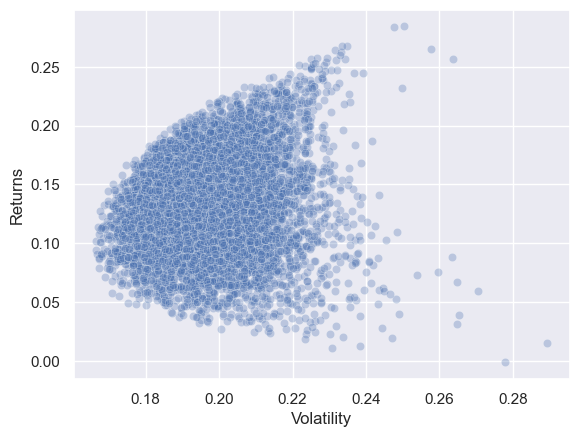

In [113]:
import seaborn as sns

sns.set_theme(style="darkgrid")

# Plot the returns and volatility of the portfolios using a scatter plot grid
sns.scatterplot(x='Volatility', y='Returns', data=portfolios, alpha=0.3)


On this graph, you can also see the combination of weights that will give you all possible combinations:

- Minimum volatility (left most point)
- Maximum returns (top most point)

In [114]:
min_volatility_portfolio = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_volatility_portfolio

Returns        0.101659
Volatility     0.166464
AAPL Weight    0.070296
GE Weight      0.040864
IBM Weight     0.198322
KO Weight      0.576156
MSFT Weight    0.114361
Name: 4587, dtype: float64

In [115]:
max_returns_portfolio = portfolios.iloc[portfolios['Returns'].idxmax()]
max_returns_portfolio

Returns        0.284362
Volatility     0.250390
AAPL Weight    0.083514
GE Weight      0.007297
IBM Weight     0.001101
KO Weight      0.034215
MSFT Weight    0.873873
Name: 5598, dtype: float64

C:\Users\lyakh\AppData\Local\Temp\ipykernel_12456\2404573180.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], color='r', marker='*', s=500)
C:\Users\lyakh\AppData\Local\Temp\ipykernel_12456\2404573180.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_returns_portfolio[1], max_returns_portfolio[0], color='g', marker='*', s=500)


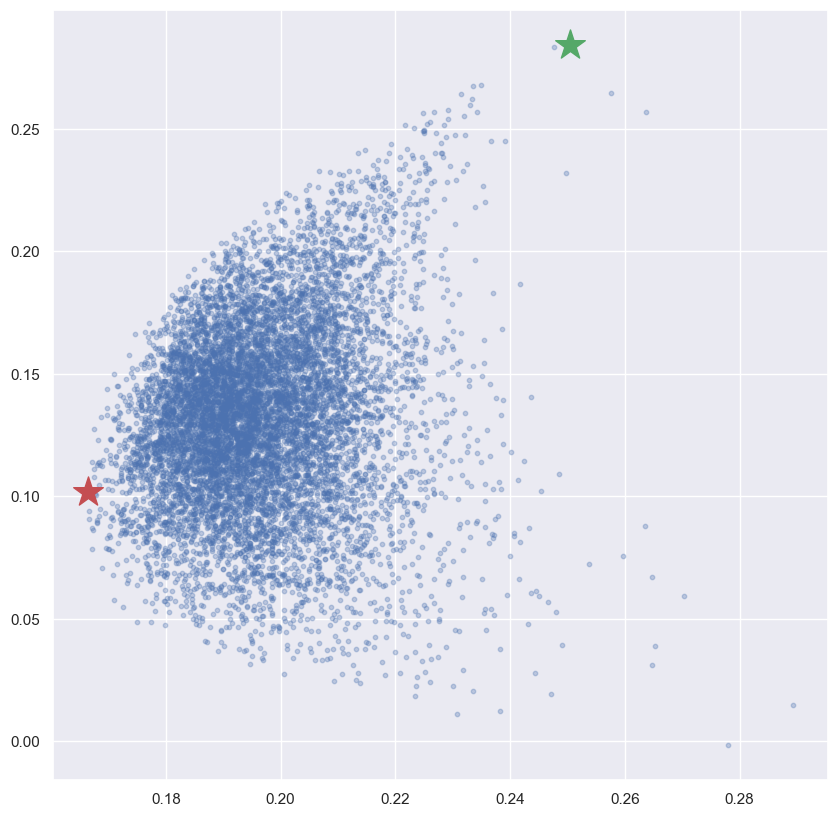

In [116]:
# Plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)

# Add the minimum volatility portfolio to the plot
plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], color='r', marker='*', s=500)

# Add the maximum returns portfolio to the plot
plt.scatter(max_returns_portfolio[1], max_returns_portfolio[0], color='g', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility. However, the returns are too low. The green star denotes the portfolio with the highest returns, but the volatility is too high. Let's try to find the optimal portfolio that gives us the highest returns with the lowest volatility.

#### 2.12.2 Sharpe Ratio

The Sharpe ratio is a measure for calculating risk-adjusted return. It is the difference between the return of an investment and the return of a risk-free investment divided by the standard deviation of the investment. The higher the Sharpe ratio, the better the investment. The Sharpe ratio is used to compare different investments and to determine which investment is better. The Sharpe ratio is also used to determine the risk-adjusted return of an investment. The sharpe ratio formula is:
$$
S_{p}=\frac{E\left[R_{p}-R_{f}\right]}{\sigma_{p}}
$$

- $S_{a}$	= 	Sharpe ratio
- $E$	= 	expected value
- $R_{p}$	= 	return of the porfolio
- $R_{f}$	= 	risk free rate
- $\sigma_{a}$	= 	standard deviation of the porfolio

We define the risk-free rate to be 1% or 0.01, which comes from the 10-year treasury bond yield. Let's calculate the sharpe ratio for our portfolio:

In [117]:
# We will use the scipy.optimize library to find the optimal portfolio
risk_free_rate = 0.01

max_sharpe_portfolio = portfolios.iloc[((portfolios['Returns']-risk_free_rate)/portfolios['Volatility']).idxmax()]

max_sharpe_portfolio

Returns        0.283603
Volatility     0.247647
AAPL Weight    0.579052
GE Weight      0.007215
IBM Weight     0.007691
KO Weight      0.012659
MSFT Weight    0.393383
Name: 3519, dtype: float64

Let's plot the efficient frontier with the sharpe ratio:

C:\Users\lyakh\AppData\Local\Temp\ipykernel_12456\252205838.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], color='r', marker='*', s=500)
C:\Users\lyakh\AppData\Local\Temp\ipykernel_12456\252205838.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_returns_portfolio[1], max_returns_portfolio[0], color='g', marker='*', s=500)
C:\Users\lyakh\AppData\Local\Temp\ipykernel_12456\252205838.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as lab

Text(0, 0.5, 'Expected Mean Returns')

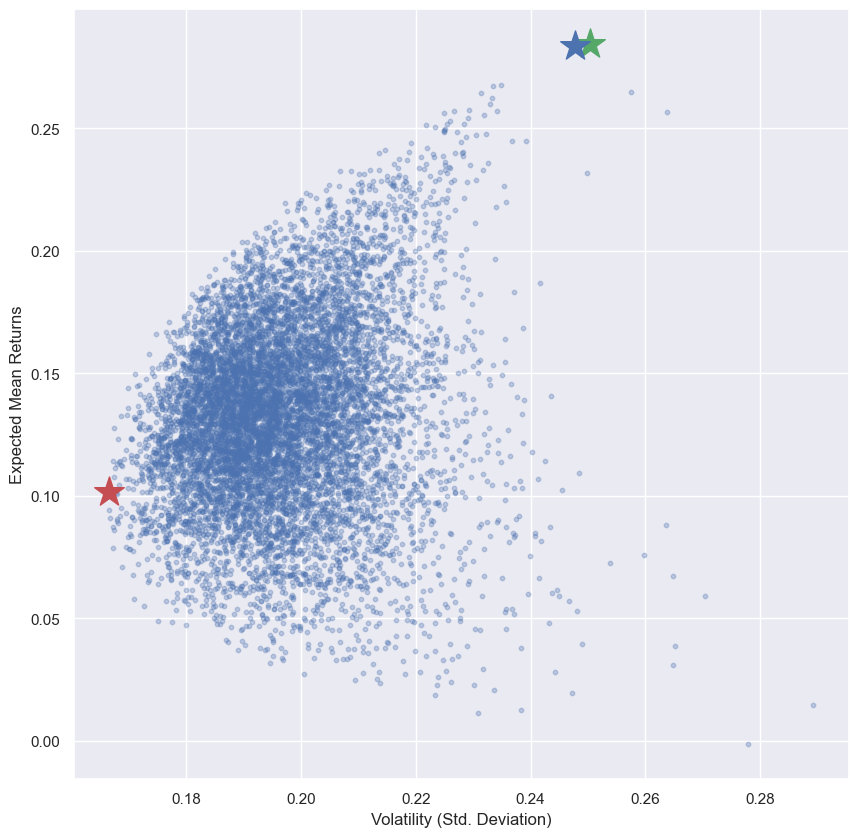

In [118]:
# Plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)

# Add the minimum volatility portfolio to the plot
plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], color='r', marker='*', s=500)

# Add the maximum returns portfolio to the plot
plt.scatter(max_returns_portfolio[1], max_returns_portfolio[0], color='g', marker='*', s=500)

# Add the maximum Sharpe ratio portfolio to the plot
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], color='b', marker='*', s=500)

# Add the efficient frontier to the plot
# plt.plot(portfolios['Volatility'], portfolios['Returns'], 'y-o', markersize=3)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Mean Returns')

If you have a higher risk tolerance, you can invest in the portfolio with the highest sharpe ratio. If you have a lower risk tolerance, you can invest in the portfolio with the lowest sharpe ratio. Given all the generated portfolio combinations, you can also try to find a portfolio that meets your risk tolerance and desired expected returns. For example, a portfolio with an expected return of 0.15 or 15% and a volatility of 0.05 or 5%:

In [119]:
# Find the portfolio that has a sharpe ratio with a volatility of 0.05 and a return of 0.15:
desired_volatility = 0.05
desired_return = 0.15

portfolios[(portfolios['Volatility'] <= desired_volatility) + (portfolios['Returns'] >= desired_return)]

,Returns,Volatility,AAPL Weight,GE Weight,IBM Weight,KO Weight,MSFT Weight
0,0.172439,0.219801,0.256852,0.320931,0.055454,0.035681,0.331082
2,0.164867,0.188623,0.149377,0.173891,0.039854,0.302889,0.333990
4,0.154279,0.183721,0.204347,0.070290,0.224798,0.249187,0.251378
7,0.160253,0.197156,0.290181,0.174611,0.167715,0.147670,0.219823
10,0.163672,0.212706,0.245089,0.283499,0.116229,0.048478,0.306705
...,...,...,...,...,...,...,...
9987,0.166437,0.183489,0.281321,0.022710,0.192295,0.300506,0.203167
9990,0.197347,0.223241,0.481293,0.177801,0.138866,0.002315,0.199725
9992,0.165904,0.193673,0.166890,0.025864,0.314152,0.139281,0.353813
9995,0.161634,0.187948,0.424628,0.070116,0.083902,0.396337,0.025017


The blue star is the portfolio with the highest returns for a given level of risk. This is the portfolio that we should invest in based on the selected stocks, which can be updated as often as we want to include new stocks or remove old ones based on correlations and other factors.

The solutions that we tried before to find the Efficient Frontier was by generaing random weights and calculating the expected returns and volatility. However, this is not the most efficient way to do it. Another option is to find the tangency and the gloabl minimum variance portfolios. The tangency portfolio is the portfolio that has the highest sharpe ratio. The global minimum variance portfolio is the portfolio that has the lowest volatility. Let's find the tangency and global minimum variance portfolios.

So, instead of making 1000 random portfolios to find the tangency and min.var. portfolios, you could also just solve for them using the equations ([Claus Munk, Financial Markets and Investments, 2018](https://scholar.google.co.uk/citations?view_op=view_citation&hl=en&user=DwpCQBYAAAAJ&citation_for_view=DwpCQBYAAAAJ:u9iWguZQMMsC)):

$$
\pi_{max}SR = \frac{1}{1\Sigma^{-1}\mu}\Sigma^{-1}\mu
$$

$$
\text{Minimum Variance Portfolio's Weights} = \frac{1}{1\Sigma^{-1}1}\Sigma^{-1}1
$$

where:
- $\Sigma^{-1}$ = is the inverse of your variance-covariance matrix
- $\mu$ = is your vector of expected returns
- $1$ = is a vector of ones with the same length as your $\mu$ vector (number of assets/stocks)

In the Minimum Variance Portfolio, the constraint are the weights sum = 1

In [120]:
# inverse of the covariance matrix
inverse_cov_matrix = np.linalg.inv(cov_matrix)

# vector of ones with the same length as the vector expected returns or number of stocks
number_of_stocks = len(StockReturns_annual_mean)
ones_vector = np.ones(number_of_stocks)

# Let's find the tangency portfolio
tangency_portfolio = np.dot(inverse_cov_matrix, StockReturns_annual_mean) / np.dot(ones_vector, np.dot(inverse_cov_matrix, StockReturns_annual_mean))

# Finding global minimum variance portfolio
# Eric Zivot, (2015). Portfolio Theory with Matrix Algebra, Page 10
global_min_var_portfolio = np.dot(inverse_cov_matrix, ones_vector)/np.dot(ones_vector, np.dot(inverse_cov_matrix, ones_vector))


print("Tangency Portfolio:", tangency_portfolio)
print("Sum of weights for tangency portfolio:", np.sum(tangency_portfolio))
print("Gloabl Minimum Variance Portfolio:", global_min_var_portfolio)
print("Sum of weights for global minimum variance portfolio:", np.sum(global_min_var_portfolio))

Tangency Portfolio: [ 0.61326668 -0.30225017 -0.71595246  0.36809463  1.03684132]
Sum of weights for tangency portfolio: 1.0
Gloabl Minimum Variance Portfolio: [0.08950547 0.01316352 0.18685006 0.62950989 0.08097106]
Sum of weights for global minimum variance portfolio: 1.0


After calculating global minimum variance portfolios, if the expected return on a portfolio is greater than the expected on the global minimum variance portfolio, then the portfolio is an efficient frontier portfolio. As result, to compute the portfolio frontier, we only need to find two efficient portfolios. The remaining frontier portfolios can then be expressed as convex combinations of these two portfolios:

$$
\mu_{z} = \alpha \cdot \mu_{x} + (1-\alpha) \cdot \mu_{x}
$$

where:
- $\alpha$ = is a scalar between 0 and 1 and it is the risk aversion parameter. The higher the risk aversion parameter, the more risk averse the investor is. The lower the risk aversion parameter, the more risk seeking the investor is.
- $\mu_{x}$ = is the expected return of the minimum variance portfolio $X$
- $\mu_{y}$ = is the expected return of the minimum variance portfolio $Y$
- $\mu_{z}$ = is the expected return of the portfolio $Z$, which is a linear combination of portfolios $X$ and $Y$

Let's create an arbitrary frontier portfolio from two efficient portfolios:


In [121]:
# Let's create an arbitrary frontier portfolio from two efficient portfolios:
efficient_portfolio_1 = min_volatility_portfolio[2:]
efficient_portfolio_2 = max_sharpe_portfolio[2:]

## Using the max sharpe portfolio and the max returns portfolio
# efficient_portfolio_1 = max_returns_portfolio[2:]
# efficient_portfolio_2 = max_sharpe_portfolio[2:]

## Another way to create the efficient portfolio is to use the tangency portfolio
# efficient_portfolio_1 = tangency_portfolio
# efficient_portfolio_2 = max_sharpe_portfolio[2:]

alpha = 0.5
frontier_portfolio_weights = alpha * efficient_portfolio_1 + (1-alpha) * efficient_portfolio_2

# Calculate the returns and volatility of the frontier portfolio
frontier_portfolio_returns = np.dot(frontier_portfolio_weights, StockReturns_annual_mean)
frontier_portfolio_volatility = np.sqrt(np.dot(frontier_portfolio_weights.T, np.dot(cov_matrix, frontier_portfolio_weights)))

print("Frontier Portfolio:", frontier_portfolio_weights)
print("Frontier Portfolio Returns:", frontier_portfolio_returns)
print("Frontier Portfolio Volatility:", frontier_portfolio_volatility)

Frontier Portfolio: AAPL Weight    0.324674
GE Weight      0.024040
IBM Weight     0.103007
KO Weight      0.294408
MSFT Weight    0.253872
dtype: float64
Frontier Portfolio Returns: 0.19263102181215846
Frontier Portfolio Volatility: 0.012017186293599639


Let's plot our frontier portfolio and compare with the previous one:

C:\Users\lyakh\AppData\Local\Temp\ipykernel_12456\651009408.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], color='r', marker='*', s=500)
C:\Users\lyakh\AppData\Local\Temp\ipykernel_12456\651009408.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_returns_portfolio[1], max_returns_portfolio[0], color='g', marker='*', s=500)
C:\Users\lyakh\AppData\Local\Temp\ipykernel_12456\651009408.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as lab

Text(0, 0.5, 'Expected Mean Returns')

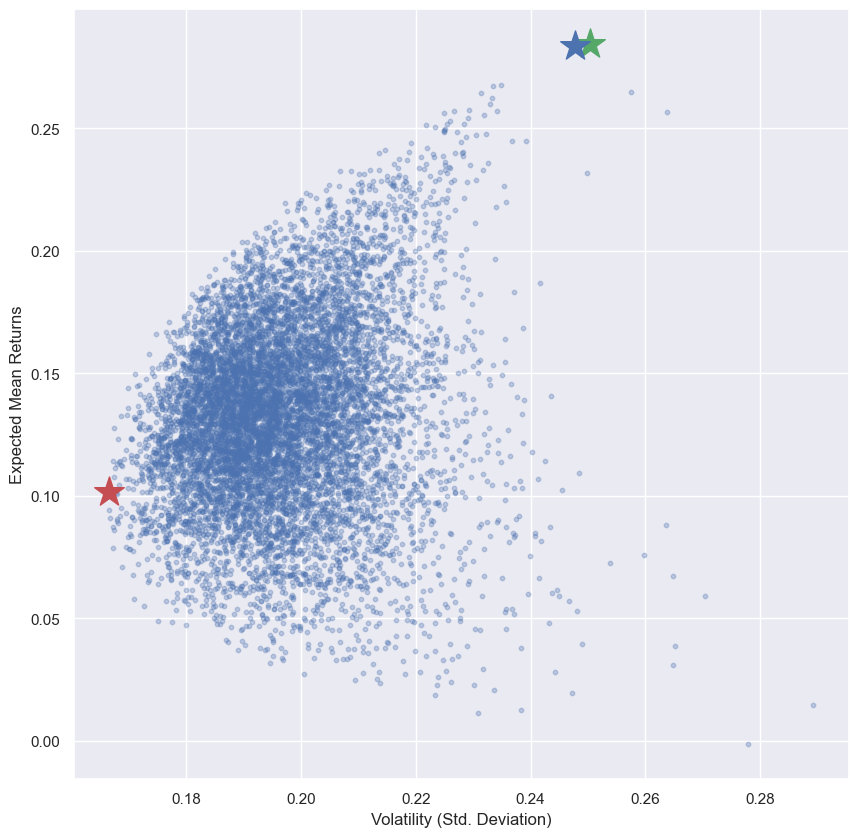

In [122]:
# Plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)

# Add the minimum volatility portfolio to the plot
plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], color='r', marker='*', s=500)

# Add the maximum returns portfolio to the plot
plt.scatter(max_returns_portfolio[1], max_returns_portfolio[0], color='g', marker='*', s=500)

# Add the maximum Sharpe ratio portfolio to the plot
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], color='b', marker='*', s=500)

# Add the efficient frontier to the plot
# plt.scatter(frontier_portfolio_volatility, frontier_portfolio_returns, color='y', marker='*', s=500)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Mean Returns')

The new frontier portfolio and its performance would be depend on the two efficient porfolios used for the linear combination. Let's go back to our Sharpe ratio portfolio and let's compare its performance of with the market-cap weighted portfolio and the equally weighted portfolio:

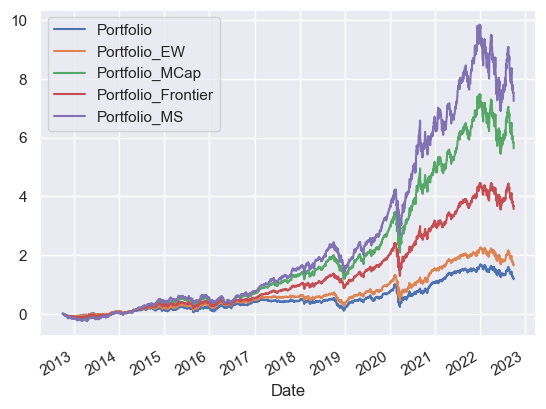

In [123]:
# Number of stocks in the portfolio
numstocks = len(StockPrices['Adj Close'].columns)

# Create an array of max sharp portfolio weights
portfolio_weights_ms = np.array(max_sharpe_portfolio[2:numstocks+2])
frontier_portfolio_weights = np.array(frontier_portfolio_weights)

# Calculate the Sharpie portfolio returns
CumulativeReturns_MS = StockReturns.iloc[:, 0:5].mul(portfolio_weights_ms, axis=1).sum(axis=1)
CumulativeReturns_MS = ((1+CumulativeReturns_MS).cumprod()-1)

CumulativeReturns_Frontier = StockReturns.iloc[:, 0:5].mul(frontier_portfolio_weights, axis=1).sum(axis=1)
CumulativeReturns_Frontier = ((1+CumulativeReturns_Frontier).cumprod()-1)

# Plot the cumulative returns of the equally-weighted portfolio
CumulativeReturns.plot(label='Portfolio')
CumulativeReturns_EW.plot(label='Portfolio_EW')
CumulativeReturns_MCap.plot(label='Portfolio_MCap')
CumulativeReturns_Frontier.plot(label='Portfolio_Frontier')
CumulativeReturns_MS.plot(label='Portfolio_MS')

plt.legend()

plt.show()

As you can see from the graphs above, the Sharpe ratio portfolio outperforms the market-cap weighted portfolio and the equally weighted portfolio. This is because the Sharpe ratio portfolio is the most efficient portfolio that gives us the highest returns for a given level of risk. The selection of a good performing portfolio requires finding the a good basket of stocks that could be highly correlated with each other or not depending in our strategy. Actively managed portfolios are usually more volatile than the market-cap weighted portfolios, but they have potential to outperform the market-cap weighted portfolios in the short run.

However, market-cap weighted portfolios are more stable and have a higher probability of outperforming actively managed portfolios in the long run. The market-cap weighted portfolios are also more diversified and less risky than the actively managed portfolios. Indeed, even seasoned investors can't beat the market consistently. The market-cap weighted portfolios are also more liquid and easier to trade than the actively managed portfolios.

For example, Warren Buffet acknowledges this fact in his [2013 Berkshire Hathaway annual shareholder letter](https://www.berkshirehathaway.com/letters/2013ltr.pdf), which included some investing advice for his wife and her trustee:

> “What I advise here is essentially identical to certain instructions I’ve laid out in my will. One bequest provides that cash will be delivered to a trustee for my wife’s benefit. . . . My advice to the trustee could not be more simple: Put 10% of the cash in short-term government bonds and 90% in a very low-cost S&P 500 index fund. (I suggest Vanguard’s.) I believe **the trust’s long-term results from this policy will be superior to those attained by most investors** . . .



## 2.13 Regularised Portfolio Optimisation

Despite the simplicity of the mean-variance optimization, the stability of the allocation is then a real problem. In this context, Michaud suggested that mean-variance maximization is in fact *error maximization*:

> The unintuitive character of many optimized portfolios can be traced to the fact that MV optimizers are, in a fundamental sense, estimation error maximizers. Risk and return estimates are inevitably subject to estimation error. MV optimization significantly overweights (underweights) those securities that have large (small) estimated returns, negative (positive) correlations and small (large) variances. These securities are, of course, the ones most likely to have large estimation errors 
>
> (Michaud, 1989,  The Markowitz Optimization Enigma: Is 'Optimized' Optimal?, Financial Analysts Journal, 45(1), pp. 33)

In a dynamic framework, estimation errors can then dramatically change the weights leading to high turnover and/or high transaction costs. Moreover, the diversifiable risk is supposed to be decreased thanks to the optimization that can be underestimated. Aware from these problems, academics and practitioners have developed techniques to reduce the impact of estimation errors.

### 2.13.1 Penalisation methods

The idea of using penalisations comes from the regularization problem of linear regressions. These techniques have been largely used in machine learning in order to improve out-of-sample forecasting. Since mean-variance optimization is related to linear regression, regularizations may improve the
performance of MVO portfolios.

$$
\tilde{r}_{n} = \alpha + \beta_{1} (\tilde{r}_{n} − \tilde{r}_{1})+\beta_{2}(\tilde{r}_{n} − \tilde{r}_{2})+ \cdots +\beta_{n-1}(\tilde{r}_{n} − \tilde{r}_{n-1})+ \tilde{\epsilon}
$$

where:
- $\tilde{r}_{n}$ is the return of the portfolio
- $\tilde{r}_{i}$ is the return of the $i$-th asset
- $\tilde{\epsilon}$ is the error term
- $\beta_{1}, \beta_{2}, \cdots, \beta_{n-1}$ correspond to the portfolio weights
- $\alpha$ corresponds to the expected return $\mu_{MV}$ of the global minimum variance portfolio. The global minimum variance portfolio is the portfolio with the lowest variance for a given level of expected return. $\alpha$ = $\mu_{MV}$.

### Ridge penalisation

The idea is to add a penalty term to the objective function in order to reduce the estimation error. The penalization term is usually a function of the weights. Ridge regression is the most common penalization method. It consists in adding a penalty term to the cost function of the Minimum Variance Portfolio (MVP) that is proportional to the sum of the squared weights:

$$
\tilde{r}_{n} = \alpha + \beta_{1} (\tilde{r}_{n} − \tilde{r}_{1})+\beta_{2}(\tilde{r}_{n} − \tilde{r}_{2})+ \cdots +\beta_{n-1}(\tilde{r}_{n} − \tilde{r}_{n-1})+ \tilde{\epsilon}
$$

where the penalization term is then in a linear regression:

$$
\lambda \sum_{i=1}^{n} x_{i}^{2}
$$

where $\lambda$ is the penalty coefficient. The penalty term is the sum of the squared weights. The penalty coefficient $\lambda$ is a tuning parameter that controls the amount of regularization. The higher the value of $\lambda$, the higher the penalty and the more the weights are reduced. The penalty term is then added to the objective function.

Then, using our formula for the global minimum variance portfolio incorporating Ridge penalisation, we obtain:

$$
\omega^{Ridge} = \frac{(\Sigma + \lambda I)^{-1}\iota}{\iota^T(\Sigma + \lambda I)^{-1}\iota}
$$

where:
- $\omega^{Ridge}$ = the weights of the portfolio
- $\Sigma$ = the covariance matrix
- $\lambda$ = the penalty coefficient
- $\iota$ = the vector of ones
- $I$ = the identity matrix of size $n \times n$
- $n$ = the number of assets/stocks

Then, we find our regularised weights by solving the equation above for a single portfolio:

In [124]:
# Let's find the Ridge weights of the portfolio:
# Set number of stocks
numstocks = len(StockPrices['Adj Close'].columns)

# Set lambda regularization parameter
lambda_ = 0.1

# Let's calculate the mean returns and covariance matrix
# Convert returns to yearly frequency
StockReturns_annual = StockPrices['Adj Close'].resample('Y')

# Get the last business day of each year
StockReturns_annual = StockReturns_annual.last()

# Calculate the mean annual returns
StockReturns_annual = StockReturns_annual.pct_change()
StockReturns_annual_mean = StockReturns_annual.mean()

# Let's calculate the covariance matrix
cov_matrix = StockReturns_annual.cov()

# Create identity matrix of size numstocks
identity_matrix = np.identity(numstocks)

# Let's calculate the regularised covariance matrix
cov_ridge = cov_matrix + lambda_* identity_matrix

# Inverse of the regularised covariance matrix
inverse_cov_ridge = np.linalg.inv(cov_ridge)

# Create a vector of ones of size numstocks
ones_vector = np.ones(numstocks)

# Calculate the weights of the rige portfolio
ridge_portfolio_weights = np.dot(inverse_cov_ridge, ones_vector) / np.dot(ones_vector.T, np.dot(inverse_cov_ridge, ones_vector))

print("Ridge Portfolio Weights:", ridge_portfolio_weights)


Ridge Portfolio Weights: [0.07719808 0.09001603 0.29383815 0.37566849 0.16327926]


Let's compare our Ridge regularised portfolio with the unregularised portfolios:

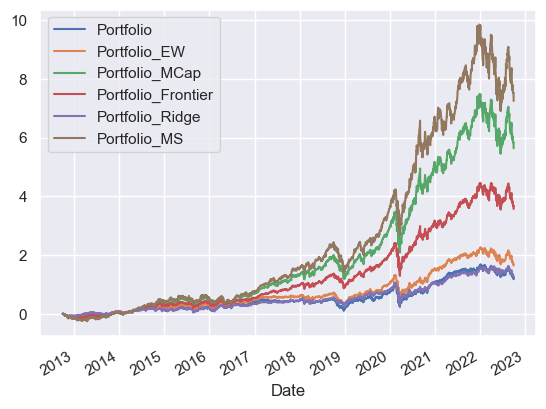

In [125]:
# Number of stocks in the portfolio
numstocks = len(StockPrices['Adj Close'].columns)

# Calculate the Sharpie portfolio returns
CumulativeReturns_Ridge = StockReturns.iloc[:, 0:5].mul(ridge_portfolio_weights, axis=1).sum(axis=1)
CumulativeReturns_Ridge = ((1+CumulativeReturns_Ridge).cumprod()-1)

# Plot the cumulative returns of the equally-weighted portfolio
CumulativeReturns.plot(label='Portfolio')
CumulativeReturns_EW.plot(label='Portfolio_EW')
CumulativeReturns_MCap.plot(label='Portfolio_MCap')
CumulativeReturns_Frontier.plot(label='Portfolio_Frontier')
CumulativeReturns_Ridge.plot(label='Portfolio_Ridge')
CumulativeReturns_MS.plot(label='Portfolio_MS')

plt.legend()

plt.show()

Another approach that we can follow is to generate more random portfolios to find a better portfolio using the Ridge penalization. We can then compare the performance of the regularised portfolio with the unregularised portfolios:

In [126]:
def portfolio_annualised_performance(weights, annual_mean_returns, cov_regularised):
    """
    Takes in weights, mean returns and covariance matrix and returns the annualised portfolio performance.
    """
    weights = np.array(weights)
    returns = np.dot(weights, annual_mean_returns)

    # Portfolio variance is the sum of the product of individual variances and the weights
    portfolio_variance = cov_regularised.mul(weights, axis=0).mul(weights, axis=1).sum().sum()

    # Daily standard deviation is the square root of the variance
    daily_standard_deviation = np.sqrt(portfolio_variance)

    # Annual standard deviation * sqrt(252 trading days) = volatility 
    volatility = daily_standard_deviation * np.sqrt(252)

    return volatility, returns

def random_portfolios(num_portfolios, annual_mean_returns, cov_ridge, risk_free_rate):
    """
    Returns the mean and standard deviation of returns for a set of randomly generated portfolios.
    """

    # Volatility is the square root of the product of weights 
    # and covariance matrix and then again product of that with transpose of weights
    # volatility = np.sqrt(np.dot(weights.T, np.dot(StockReturns_annual.cov()*252, weights)))

    # Append the returns, volatility and weights to the portfolio lists
    portfolio_retuns = []
    portfolio_volatility= []
    portfolio_weights = []

    for i in range(num_portfolios):

        # Generate random weights
        weights = np.random.random(numstocks)
        weights /= np.sum(weights)

        # Calculate the portfolio performance
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, annual_mean_returns, cov_ridge)

        portfolio_retuns.append(portfolio_return)
        portfolio_volatility.append(portfolio_std_dev)
        portfolio_weights.append(weights)

    data = {'Returns':portfolio_retuns, 'Volatility':portfolio_volatility}

    for counter, ticker in enumerate(StockReturns.columns.tolist()):
        data[ticker+' Weight'] = [Weight[counter] for Weight in portfolio_weights]

    # Dataframe of the 10000 portfolios created
    portfolios  = pd.DataFrame(data)

    
    return portfolios


# Let's define our number of portfolios
num_portfolios = 1000

# Let's define our risk free rate
risk_free_rate = 0.01

# Set lambda regularization parameter
lambda_ = 0.1

# Set number of stocks
numstocks = len(StockPrices['Adj Close'].columns)

# Let's calculate the mean returns and covariance matrix
# Convert returns to yearly frequency
StockReturns_annual = StockPrices['Adj Close'].resample('Y')

# Get the last business day of each year
StockReturns_annual = StockReturns_annual.last()

# Calculate the mean annual returns
StockReturns_annual = StockReturns_annual.pct_change()
StockReturns_annual_mean = StockReturns_annual.mean()

# Let's calculate the covariance matrix
cov_matrix = StockReturns_annual.cov()

# Create identity matrix of size numstocks
identity_matrix = np.identity(numstocks)

# Let's calculate the regularised covariance matrix
cov_ridge = cov_matrix + lambda_* identity_matrix

# Gernerate random portfolios
rand_portfolios = random_portfolios(num_portfolios, StockReturns_annual_mean, cov_ridge, risk_free_rate)

# Let's find the maximum sharpe ratio
max_sharpe_portfolio_ridge = rand_portfolios.iloc[((rand_portfolios['Returns']-risk_free_rate)/rand_portfolios['Volatility']).idxmax()]

max_sharpe_portfolio_ridge

Returns        0.239156
Volatility     4.744770
AAPL Weight    0.338325
GE Weight      0.023148
IBM Weight     0.090103
KO Weight      0.095332
MSFT Weight    0.453093
Name: 516, dtype: float64

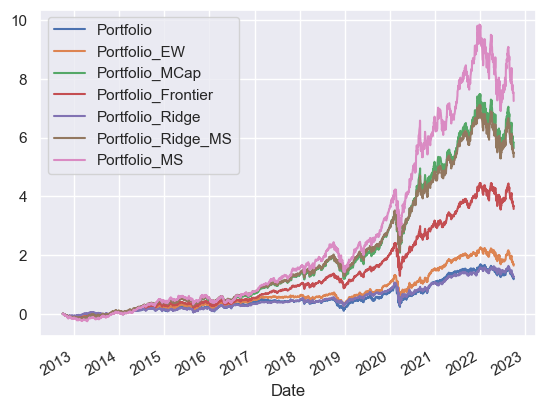

In [127]:
# Number of stocks in the portfolio
numstocks = len(StockPrices['Adj Close'].columns)

# Create an array of max sharp portfolio weights
max_sharpe_portfolio_ridge_weights = np.array(max_sharpe_portfolio_ridge[2:numstocks+2])

# Calculate the Sharpie portfolio returns
CumulativeReturns_Ridge_MS = StockReturns.iloc[:, 0:5].mul(max_sharpe_portfolio_ridge_weights, axis=1).sum(axis=1)
CumulativeReturns_Ridge_MS = ((1+CumulativeReturns_Ridge_MS).cumprod()-1)

# Plot the cumulative returns of the equally-weighted portfolio
CumulativeReturns.plot(label='Portfolio')
CumulativeReturns_EW.plot(label='Portfolio_EW')
CumulativeReturns_MCap.plot(label='Portfolio_MCap')
CumulativeReturns_Frontier.plot(label='Portfolio_Frontier')
CumulativeReturns_Ridge.plot(label='Portfolio_Ridge')
CumulativeReturns_Ridge_MS.plot(label='Portfolio_Ridge_MS')
CumulativeReturns_MS.plot(label='Portfolio_MS')

plt.legend()

plt.show()

<div class="alert alert-warning">
<b>EXERCISE 4: </b> 
    
Make your own portfolio with the stocks that you want and compare the performance of your portfolio using the different methods that you just learn. Try to find the optimal portfolio that gives you the highest returns with the lowest volatility.

### Lasso penalisation

The Lasso penalization is another penalization method that is used in machine learning. It is a shrinkage method that is used to reduce the complexity of the model. It is also used to select the most important features of a model. The Lasso penalization is a regularization method that is used to reduce the estimation error. The formula for the Lasso penalization is:

$$
\lambda \sum_{i=1}^{n} |x_{i}|
$$

where $\lambda$ is the penalty coefficient. The penalty term is the sum of the absolute values of the weights. The penalty coefficient $\lambda$ is a tuning parameter that controls the amount of regularization. The higher the value of $\lambda$, the higher the penalty and the more the weights are reduced. The penalty term is then added to the objective function.

Unfortunately, Lasso does not have close form solution like Ridge. We can use gradiente descent to find the optimal weights. We are going to use scikit-learn implementation of Lasso penalization to find the weights of the portfolio by using all the random portfolios that we have generated:

In [128]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Set lambda regularization parameter
alpha = 0.1

# Create the model
lasso = Lasso(alpha=alpha)

# Fit the model
lasso.fit(X=rand_portfolios.iloc[:, 1:len(rand_portfolios.columns)], y=rand_portfolios['Returns'])

# Get the weights
lasso_weights = lasso.coef_

print(lasso_weights)

[ 0.  0. -0. -0. -0.  0.]


Since Lasso is a shrinkage method, it is going to reduce the weights of the assets that are not important. We can see that the weights of the assets that are not important are reduced to zero. 

Lasso improves the sparsity and thus the selection of assets in large portfolio.

## 2.14 The correlation matrix

The correlation matrix can be used to estimate the linear historical relationship between the returns of multiple assets. You can use the built-in .corr() method on a pandas DataFrame to easily calculate the correlation matrix.

Correlation ranges from -1 to 1. The diagonal of the correlation matrix is always 1, because a stock always has a perfect correlation with itself. The matrix is symmetric, which means that the lower triangle and upper triangle of the matrix are simply reflections of each other since correlation is a bi-directional measurement.

In [149]:
StockReturns = StockPrices['Adj Close'].pct_change()

# Calculate the correlation matrix
correlation_matrix = StockReturns.corr()

# Print the correlation matrix
print(correlation_matrix)

          AAPL        GE       IBM        KO      MSFT
AAPL  1.000000  0.322148  0.385558  0.336751  0.606189
GE    0.322148  1.000000  0.461639  0.379125  0.324980
IBM   0.385558  0.461639  1.000000  0.467880  0.448948
KO    0.336751  0.379125  0.467880  1.000000  0.404760
MSFT  0.606189  0.324980  0.448948  0.404760  1.000000


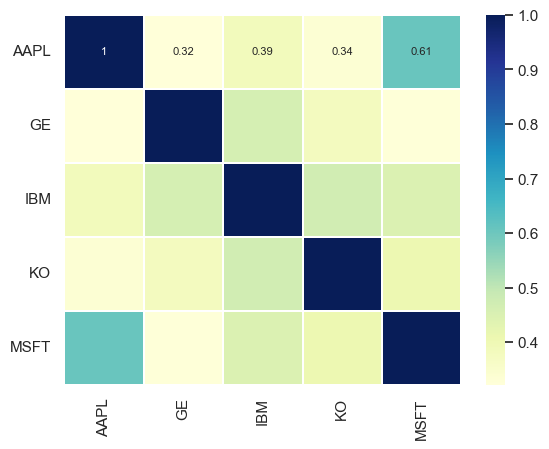

In [141]:
# Import seaborn as sns
import seaborn as sns

# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

- A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.
- A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.
- A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

The correlation matrix will help you decide whether your portfolio is diversified enough for your preferences, or whether you should reconsider choosing different, less correlated stocks. For example, less technology related stocks.

## 2.15 Random Walk

The simulation of random walks are used to represent the movements across time in the stock market.

Let’s first consider a simple random walk starting at 0 with steps of 1 and -1 occurring with equal probability. A pure Python way to implement a single random walk with 1,000 steps using the built-in random module:

In [131]:
import random 
position = 0
walk = [position] 
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1 
    position += step
    walk.append(position)

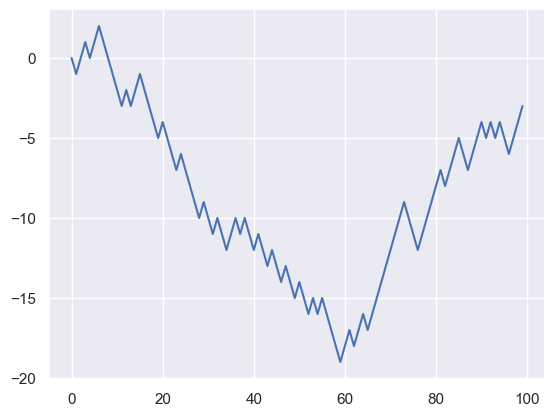

In [132]:
plt.plot(walk[:100]) #plot of the first 100 values on one of these random walks.
plt.show()

You might make the observation that walk is simply the cumulative sum of the random steps and could be evaluated as an array expression. 

Thus, we use the **`np.random`** module to draw 1,000 coin flips at once, set these to 1 and -1, and compute the cumulative sum:

In [133]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

From this we can begin to extract statistics like the minimum and maximum value along the walk’s trajectory:

In [134]:
print(walk.min())
print(walk.max())

-14
23


A more complicated statistic is the first <mark>crossing time</mark>, the step at which the random walk reaches a particular value. 

Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction. **`np.abs(walk) >= 10`** gives us a boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first 10 or -10. Turns out this can be computed using **`argmax`**, which returns the first index of the maximum value in the boolean array (**`True`** is the maximum value):

In [135]:
(np.abs(walk) >= 10).argmax()

151

Note that using argmax here is not always efficient because it always makes a full scan of the array. In this special case once a True is observed we know it to be the maximum value.

### Simulating many random walks at once

If your goal was to simulate many random walks, say 5,000 of them, you can generate all of the random walks with minor modifications to the above code. The **`numpy.random`** functions if passed a 2-tuple will generate a 2D array of draws, and we can compute the cumulative sum across the rows to compute all 5,000 random walks in one shot:

In [136]:
nwalks = 5000
nsteps = 1000

draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks



array([[  1,   2,   1, ...,   0,   1,   2],
       [  1,   0,  -1, ...,  10,  11,  12],
       [ -1,   0,  -1, ..., -30, -29, -28],
       ...,
       [  1,   0,   1, ...,  62,  61,  62],
       [ -1,  -2,  -1, ..., -52, -51, -52],
       [  1,   2,   3, ...,  10,  11,  12]])

Now, we can compute the maximum and minimum values obtained over all of the walks:

In [137]:
walks.max()
walks.min()

-122

Out of these walks, let’s compute the minimum crossing time to 30 or -30. This is slightly tricky because not all 5,000 of them reach 30. We can check this using the any method:

In [138]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number of walks that hit 30 or -30

3420

We can use this boolean array to select out the rows of walks that actually cross the absolute 30 level and call argmax across axis 1 to get the crossing times:

In [139]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

504.659649122807

<div class="alert alert-warning">
<b>EXERCISE:</b> Random walks
    
<p> Feel free to experiment with other distributions for the steps other than equal sized coin flips. You need only use a different random number generation function, like normal to generate normally distributed steps with some mean and standard deviation:</p>
    
**`steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))`**

</div>

### 2.15.1 A random walk simulation in Finance

Stochastic or random movements can be used to describe stock market movements.

Use the np.random.normal() function to model random walk movements of the USO oil ETF with a constant daily average return (mu) and average daily volatility (vol) over the course of T trading days.

In [151]:
# Set the simulation parameters
mu = np.mean(StockReturns['Adj Close'])
vol = np.std(StockReturns['Adj Close'])
T = 252 # Number of trading days
S0 = 10 # Initial stock price

# Add one to the random returns
rand_rets = np.random.normal(mu,vol,T) + 1

# Forecasted random walk
forecasted_values = rand_rets.cumprod()*S0

# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

KeyError: 'Adj Close'

### 2.15.2 Monte carlo simulations

Monte-Carlo simulations are used to model a wide range of possibilities. Monte-Carlos simulations involve generating a large number of random variants of a given model, allowing a wide distribution of possible paths to be analyzed. This can allow you to build a comprehensive forecast of possibilities to sample from without a large amount of historical data.

Both the return values and the Monte-Carlo paths can be used for analysis of everything ranging from option pricing models and hedging to portfolio optimization and trading strategies.

Let's use the parameters mu, vol, T, and S0 are available from the previous cell.

In [142]:
# Loop through 100 simulations
for i in range(0,100):

    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

NameError: name 'mu' is not defined

# 3. What Is Machine Learning?

A slightly more general definition

> *[Machine learning is the] field of study that gives computers the ability to learn without being explicitly programmed*. -Arthur Samuel, 1959

And a more engineering-oriented one:

> *A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.* -Tom Mitchell, 1997


Your spam filter is a machine learning program that, given examples of spam emails (flagged by users) and examples of regular emails (nonspam, also called “ham”), can learn to flag spam. The examples that the system uses to learn are called the *training set*. Each training example is called a *training instance* (or *sample*). The part of a machine learning system that learns and makes predictions is called a *model*. Neural networks and random forests are examples of models.

In this case, the task `T` is to *flag spam for new emails*, the experience `E` is the *training data*, and the performance measure `P` needs to be defined; for example, you can use the *ratio of correctly classified emails*. This particular performance measure is called *accuracy*, and it is often used in classification tasks.

If you just download a copy of all Wikipedia articles, your computer has a lot more data, but it is not suddenly better at any task. This is not machine learning.

## 3.1 Why Use Machine Learning?

Consider how you would write a spam filter using traditional programming techniques:

<img src="./figures/spam_filter_traditional_approach.png" height="60%" width="60%">

What if spammers notice that all their emails containing “4U” are blocked? They might start writing “For U” instead. A spam filter using traditional programming techniques would need to be updated to flag “For U” emails. If spammers keep working around your spam filter, you will need to keep writing new rules forever.

Since the problem is difficult, your program will likely become a long list of complex rules—pretty hard to maintain.

In contrast, a spam filter based on machine learning techniques automatically learns which words and phrases are good predictors of spam by detecting unusually frequent patterns of words in the spam examples compared to the ham examples. The program is much shorter, easier to maintain, and most likely more accurate:

<img src="./figures/spam_filter_ml_approach.png" height="60%" width="60%">

So, a spam filter based on machine learning techniques automatically notices that “For U” has become unusually frequent in spam flagged by users, and it starts flagging them without your intervention:


<img src="./figures/spam_filter_ml_approach2.png" height="60%" width="60%">

once a spam filter has been trained on enough spam, it can easily be inspected to reveal the list of words and combinations of words that it believes are the best predictors of spam. Sometimes this will reveal unsuspected correlations or new trends, and thereby lead to a better understanding of the problem. Digging into large amounts of data to discover hidden patterns is called *data mining*, and machine learning excels at it:

<img src="./figures/spam_filter_ml_approach3.png" height="60%" width="60%">

To summarize, machine learning is great for:

- Problems for which existing solutions require a lot of fine-tuning or long lists of rules (a machine learning model can often simplify code and perform better than the traditional approach)

- Complex problems for which using a traditional approach yields no good solution (the best machine learning techniques can perhaps find a solution)

- Fluctuating environments (a machine learning system can easily be retrained on new data, always keeping it up to date)

- Getting insights about complex problems and large amounts of data

Examples of Applications:

- Analyzing images of products on a production line to automatically classify them
- Detecting tumors in brain scans
- Automatically classifying news articles
- Automatically flagging offensive comments on discussion forums
- Summarizing long documents automatically
- Creating a chatbot or a personal assistant
- Forecasting your company’s revenue next year, based on many performance metrics
- Making your app react to voice commands
- Detecting credit card fraud
- Segmenting clients based on their purchases so that you can design a different marketing strategy for each segment
- Recommending a product that a client may be interested in, based on past purchases

## 3.2 End-to-End Machine Learning Project

1. Look at the big picture.

2. Get the data.

3. Explore and visualize the data to gain insights.

4. Prepare the data for machine learning algorithms.

5. Select a model and train it.

6. Fine-tune your model.

7.  Present your solution.

8. Launch, monitor, and maintain your system.


Since in many situations you don’t really need to know the implementation details of a machine learning algorithm, we can work with popular and well tested libraries that have implemented a machine learning algorithm. We are going to be using [**`scikit-learn`**](http://scikit-learn.org/) for some of the machine learning algorithms

However, having a good understanding of how things work can help you quickly home in on the appropriate model, the right training algorithm to use, and a good set of hyperparameters for your task.

[**`scikit-learn`**](http://scikit-learn.org/)

It is very easy to use, yet it implements many machine learning algorithms efficiently, so it makes for a great entry point to learning machine learning. It was created by David Cournapeau in 2007, and is now led by a team of researchers at the French Institute for Research in Computer Science and Automation (Inria). `scikit-learn` provides:

- The suite of data preparation tools, such as scaling and imputing data.
- Machine learning algorithms
- The resampling methods for estimating the performance of a model on unseen data, specifically the **`TimeSeriesSplit`** class 


# 4. Linear Regression

The linear regression formula is:
$$
Y_i=f(X_i, \beta)+e_i
$$

- $Y_i$	= 	dependent variable
- $f$	= 	function
- $X_i$	= 	independent variable
- $\beta$	= 	unknown parameters
- $e_i$	= 	error terms


A linear regression line has an equation of the form:
$$
\hat{Y}=a + bX
$$

where:
- $X$ is the explanatory variable or feature value
- $\hat{Y}$ is the dependent variable or predicted value. 
- $b$ is the slope of the line 
- $a$ is the intercept (the value of `y` when `x` = 0)


And the formula above could be re-written as:
$$
\hat{y} = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + \cdots + \theta_{n} x_{n}
$$

where:

- $\hat{Y}$ is the predicted value.

- $\mathrm{n}$ is the number of features.

- ${x}_{i}$ is the ith feature value.

- $\theta_{j}$ is the jth model parameter (including the bias term $\theta_{0}$ and the feature weights $\theta_{1}$, $\theta_{2}$, ⋯, $\theta_{n}$).

**The equation above could be re-written in vectorized form:**
$$
\hat{y}=h_{\theta}(x)=\theta \cdot x
$$


In this equation:

- $\theta$ is the model’s parameter vector, containing the bias term $\theta_{0}$ and the feature weights $\theta_{1}$ to $\theta_{n}$.

- $x$ is the instance’s feature vector, containing $h_{0}$ to $h_{n}$, with $h_{0}$ always equal to 1.

- $\theta \cdot x$ is the dot product of the vectors $\theta$ and $x$, which is of course equal to $\theta_{0}x_{0}$ + $\theta_{1}x_{1}$ + $\theta_{2}x_{2}$ + $\cdots$ + $\theta_{n}x_{n}$.

- $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$.

### Cost functions

To train a linear regression model, we need to find the $\hat{Y}$ or `predicted values` that minimizes the performance measure selected for our model, such as:

- Accuracy: `y` (actual values) - $\hat{Y}$ (predicted values):
$$
Accuracy = \frac{\text{Number of Correct predictions}}{\text{Total number of predictions}}
$$


- Mean squared error (MSE):
$$
\mathrm{MSE} = \frac{1}{m} \sum_{i=1}^{m}(Y_{i}-\hat{Y}_{i})^2
$$

${m}$	=  number of data points

$Y_{i}$ = observed or actual values

$\hat{Y}_{i}$	= predicted values


The MSE could be re-written to include the vectorised form of the linear regression formula:
$$
\text{MSE} \left(\right. X , h_{\theta} \left.\right) = \frac{1}{m} \sum_{i = 1}^{m} (y^{(i)} - \theta^{\top} x^{(i)})^{2}
$$


we write $h_{\theta}$ instead to make it clear that the model is parametrized by the vector $\theta$

- Root Mean squared error (RMSE):
$$
\sqrt{MSE}
$$

## 4.1 The Normal Equation

The Normal equation is direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set). In other words, a mathematical equation that gives the result directly of the value of $\theta$ that minimizes the cost function (MSE):

$$
\hat{\theta} = (X^{T} X)^{- 1} X^{T} y
$$


where:
- $\hat{θ}$ (theta): is the value of $\theta$ that minimizes the cost function. 
- X: Input feature value of each instance. 
- y: Output value of each instance. `y` is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.


The Normal equation computes the inverse of $X^{T}\cdot X$, which is an (n + 1) × (n + 1) matrix (where n is the number of features).

Let's generate some linear-looking data to test this equation:

In [9]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible

m = 100  # number of instances for our vectors

X = 2 * np.random.rand(m, 1)  # column vector of
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

Let's visualise our toy data:

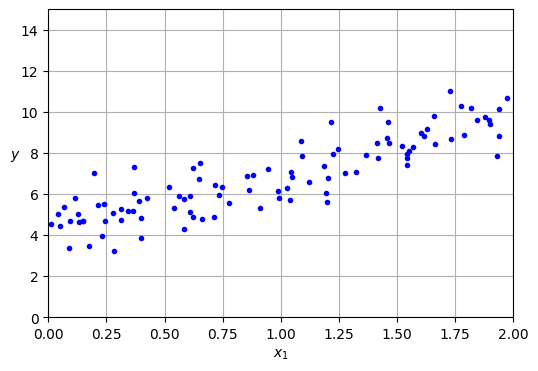

In [12]:
# extra code – generates and saves Figure 4–1

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
# save_fig("generated_data_plot")
plt.show()

Now let’s compute $\theta$ using the Normal equation. We will use the `inv()` function from NumPy’s linear algebra module (`np.linalg`) to compute the inverse of a matrix, and the `dot()` (the `@` symbol) method for matrix multiplication:

In [13]:
from sklearn.preprocessing import add_dummy_feature

# add the dummy feature 1 as the first column:
# x0 = 1 to each instance
# which is equivalent to setting the intercept to 1
X_b = add_dummy_feature(X)  

# Find the best theta using the normal equation
# X_b.T = Transpose X_b (use the first row of the array as the first column of the new array)
# Calcualte the dot product of the arrays X_b.T and X_b
# Inverse of the array result of the dot product of X_b.T and X_b using the np.linalg.inv() function
# Calculate the dot product of the arrays X_b.T and y by multiplying the transpose of X_b by y
# Calculate the dot product of the arrays result of the dot product of X_b.T and X_b and the result of the dot product of X_b.T and y
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Let's see what theta is
theta_best

array([[4.21509616],
       [2.77011339]])

We would have hoped for $\theta_{0} = 4$ and $\theta_{1} = 3$ instead of $\theta_{0} = 4.215$  and $\theta_{1} = 2.770$. Close enough, but the noise made it impossible to recover the exact parameters of the original function.

Now we can make predictions using $\hat{θ}$:

In [14]:
X_new = np.array([[0], [2]])

# add the dummy feature 1 as the first column:
# x0 = 1 to each instance
# which is equivalent to setting the intercept to 1
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

Let's visualise the prediction:

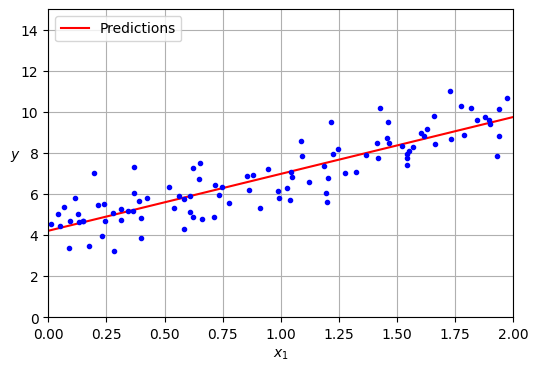

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
# save_fig("linear_model_predictions_plot")

plt.show()

Now that we were able to implement our linear regression, we can compare it with the implementation of it in Scikit-Learn:

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [18]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [19]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [20]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

#### Computational Complexity

The Normal Equation computes the inverse of $X^{T}\cdot X$, which is an (n + 1) × (n + 1) matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^{3})$ (depending on the implementation). In other words, if you double the number of features, you multiply the computation time by roughly $2^{2.4} = 5.3$ to $2^{3} = 8$.

### 4.2 Cross-Validation

A good way to evaluate a model is to use cross-validation using k-fold cross-validation with 10 folds. **k-fold cross-validation means splitting the training set into k folds (in this case, 10)**, then training the **model k times**, holding out a different fold each time for evaluation

We will use Scikit-Learn’s `cross_val_score()` function: it evaluates the `LinearRegression` model using 10-fold cross-validation. Remember that cross-validation means:
1. splitting the training set into 10 distinct subsets called folds
2. training the model 10 times, each time picking a different fold for evaluation and training on the other 9 folds
2. making predictions and evaluating them on each fold using a model trained on the remaining 9 folds. 

The result is an array containing the 10 evaluation scores:

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Define cross-validation method to use
cv = KFold(n_splits=10, 
random_state=42, 
shuffle=True) # KFold’s shuffle parameter set to True to allow KFold 
# to randomly pick the datapoints which would become part of the train and test set

# Build multiple linear regression model
model = LinearRegression()

# Evaluate model using cross-validation
# Name of the scoring available in https://scikit-learn.org/stable/modules/model_evaluation.html
for i, score in enumerate(cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)):
    print(f"MSE for the fold no. {i} on the test set: {score}")

MSE for the fold no. 0 on the test set: -0.761186504669626
MSE for the fold no. 1 on the test set: -0.5262535666467013
MSE for the fold no. 2 on the test set: -0.4886221820240649
MSE for the fold no. 3 on the test set: -0.9043116423139536
MSE for the fold no. 4 on the test set: -1.2724584868192643
MSE for the fold no. 5 on the test set: -0.8650981956451227
MSE for the fold no. 6 on the test set: -0.784687292429866
MSE for the fold no. 7 on the test set: -0.6897261744770588
MSE for the fold no. 8 on the test set: -0.8935199923807126
MSE for the fold no. 9 on the test set: -1.0982588219555647


If you have enough resources consider applying cross-validation to your problem. It will not only help you use less data, but **an inconsistent score on the different folds would suggest that you have missed some important relation inside your data.**

### 4.3 Feature Selection

One way to improve a model is to feed it the best possible features, leaving out the useless ones. This is called feature selection.

#### 4.3.1 Feature Selection with Scikit-Learn

Scikit-Learn provides a simple way to select a subset of features. First, it creates a boolean array indicating whether each feature is useful or not/ Then, it creates a new training set containing only the useful features:

In [22]:
# First, we need to import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets

# Load the toy dataset from sckit-learn library
boston = datasets.load_boston()

print(boston.DESCR)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [23]:
# Convert the dataset into a pandas dataframe
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Add the target variable to the dataframe
boston_df['PRICE'] = boston.target

NameError: name 'boston' is not defined

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(boston_df['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

In [ ]:
# Plot all the features against the target variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(boston_df.corr(), annot=True)

Based on the above, we can see that `RM` and `LSTAT` features are highly correlated with the target value `Price`. These could be good initial features to use for our model while dropping the rest of features. However, we can also use the `feature_selection` module from Scikit-Learn to select the best features for our model. We are going to use the p-values to select the best features. 

The p-value is a number between 0 and 1 that indicates the probability that the coefficient of a feature is zero (i.e., the feature is useless, and you should remove it from the model). The higher the p-value, the less likely the coefficient is zero. In other words, the higher the p-value, the more likely the feature is useless.

The `f_regression()` function computes the F-value and p-value for each feature. The F-value measures how much the model fits the data, while the p-value measures how likely it is that the coefficients of the model are zero. The higher the F-value, the better the model fits the data. The lower the p-value, the more likely the coefficients are not zero.

We are going to use a threshold of 0.05 p-value to select the best features. This means that we are going to select the features that have a p-value less than 0.05:

In [ ]:
# Using feature_selection module from sklearn to select the best features
from sklearn.feature_selection import f_regression

# Select the best 5 features using f_regression
best_features = f_regression(X=boston_df.drop('PRICE', axis=1), y=boston_df['PRICE'])

p_values = pd.Series(best_features[1])

# Create a dataframe with the best features using p-values
best_features_df = pd.DataFrame({'Features': boston_df.drop('PRICE', axis=1).columns, 'P-values': p_values})

# Sort the dataframe by the p-values
best_features_df.sort_values(by='P-values', inplace=True)

# Remove the features with p-values greater than 0.05
best_features_df = best_features_df[best_features_df['P-values'] < 0.05]

# Print the best features
best_features_df

In [ ]:
# Create a list of the best features
best_features_list = best_features_df['Features'].to_list()

# Create a new dataframe with the best features
boston_df = boston_df[best_features_list + ['PRICE']]

# Plot the heatmap again to see the correlation between the best features and the target variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(boston_df.corr(), annot=True)

Let's look at the F-Scores to see which features are the most important from this metrict:

In [ ]:
f_scores = pd.Series(best_features[0])

# Create a dataframe with the best features using F-Scores
best_features_df = pd.DataFrame({'Features': boston_df.drop('PRICE', axis=1).columns, 'F-Scores': f_scores})

# Sort the dataframe by the best features
best_features_df.sort_values(by='F-Scores', ascending=False, inplace=True)

# Plot the best features
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Features', y='F-Scores', data=best_features_df)

Now, let's train our linear regression model with the selected best features, but first let's split the data into training and test sets and scale the data:

In [24]:
from sklearn.preprocessing import StandardScaler

# Create a new dataframe with the best features
boston_df = boston_df[best_features_list + ['PRICE']]

# Create a new dataframe with the best features
X = boston_df.drop('PRICE', axis=1)

# Create a new dataframe with the target variable
y = boston_df['PRICE']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()

# Fit the scaler to the train set
scaler.fit(X_train)

# Transform the train set
X_train = scaler.transform(X_train)

# Transform the test set
X_test = scaler.transform(X_test)

NameError: name 'boston_df' is not defined

Let's train our linear regression model:

In [ ]:
# Let's train the Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the train set
lin_reg.fit(X_train, y_train)

# Predict the target variable on the train set
y_train_pred = lin_reg.predict(X_train)

# Predict the target variable on the test set
y_test_pred = lin_reg.predict(X_test)

# Calculate the R2 score on the train set
r2_train = r2_score(y_train, y_train_pred)

# Calculate the R2 score on the test set
r2_test = r2_score(y_test, y_test_pred)

# Calculate the RMSE on the train set
mse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate the RMSE on the test set
mse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [ ]:
# Print the R2 score on the train set
print(f"R2 score on the train set: {r2_train}")
print(f"R2 score on the test set: {r2_test}")

# Print the MSE on the train set
print(f"MSE on the train set: {mse_train}")
print(f"MSE on the test set: {mse_test}")

Let's plot the predictions and the actual values:

In [ ]:
# Create a dataframe with the actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Plot the actual and predicted values
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='Actual', y='Predicted', data=results_df)

In [ ]:
# Plot the linear regression line against the train set
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x='Actual', y='Predicted', data=results_df)


# 5. Gradient Descent

In the previous section, we used the Normal Equation to compute the model parameters $\theta$ that minimize the cost function. However, the Normal Equation gets very slow when the number of features grows large (e.g., 100,000).  One way to speed up the Normal Equation is to use an iterative optimization algorithm such as Gradient Descent.

Gradient descent (GD) is an iterative optimization approach. In the case of our linear regression implementation, Gradient descent (GD) could be used to iteratively find the parameters theta (θ) that minimize the loss function

Suppose you are lost in the mountains in a dense fog, and you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what gradient descent does: it measures the local gradient of the error function with regard to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

<img src="./figures/gradient_descent.png" height="60%" width="60%">

In this depiction of gradient descent, the model parameters are initialized randomly and get tweaked repeatedly to minimize the cost function; the `learning step size` is proportional to the slope of the cost function, so the steps gradually get smaller as the cost approaches the minimum

If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time:

<img src="./figures/gd1.png" height="60%" width="60%">

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before:

<img src="./figures/gd2.png" height="60%" width="60%">

Additionally, not all cost functions look like nice, regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrain, making convergence to the minimum difficult. Figure 4-6 shows the two main challenges with gradient descent. If the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. If it starts on the right, then it will take a very long time to cross the plateau. And if you stop too early, you will never reach the global minimum:

<img src="./figures/gd3.png" height="60%" width="60%">

Fortunately, the MSE cost function for a linear regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them is never below the curve. This implies that there are no local minima, just one global minimum:

<img src="./figures/gd4.png" height="60%" width="60%">

This diagram also illustrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). It is a search in the model’s parameter space.


When using gradient descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

## 5.1 Batch Gradient Descent

Batch Gradient Descent uses the whole batch of training data at every step. As a result, **it is terribly slow on very large training sets**.

However, gradient descent scales well with the number of features. **Training a linear regression model when there are hundreds of thousands of features is much faster using gradient descent than using the Normal equation or SVD decomposition**.

To implement gradient descent, you need to compute the gradient of the cost function with regard to each model parameter $θ_{(j)}$. In other words, you need to calculate how much the cost function will change if you change $θ_{(j)}$ just a little bit. This is called a `partial derivative`. The partial derivative of MSE (cost function) is:

$$
\frac{\partial}{\partial \left(\theta\right)_{j}} \text{MSE} \left(\right. \theta \left.\right) = \frac{2}{m} \sum_{i = 1}^{m} \left(\right. \left(\theta\right)^{\top} x^{\left(\right. i \left.\right)} - y^{\left(\right. i \left.\right)} \left.\right) x_{j}^{\left(\right. i \left.\right)}
$$

It is like asking, **“What is the slope of the mountain under my feet if I face east”?** and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions)

The formula for each Gradient descent step is:

$$
\left(\theta\right)^{\left(\right. \text{next step} \left.\right)}=\theta-\eta\left(\nabla\right)_{\theta}\text{MSE}\left(\right.\theta\left.\right)
$$

where:
- θ (theta): the value of θ that minimizes the cost function at from previous step
- η (eta): learning rate
- $\nabla_{\theta}\text{MSE}(\theta)$: gradient vector containing all the partial derivatives of the cost function (one for each model parameter)

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting $\nabla_{\theta}\text{MSE}(\theta)$ from θ. 

In [ ]:
# for reproducibility
np.random.seed(42)

# learning rate
eta = 0.1

# number of complete passes through the training dataset. 
n_epochs = 1000

# number of instances in the training dataset
m = len(X_b)  

# randomly initialized model parameters
theta = np.random.randn(2, 1) 

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

You may wonder how to set the number of `epochs`. If it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time while the model parameters do not change anymore. 

A simple solution is to **set a very large number of epochs but to interrupt the algorithm when the gradient vector becomes tiny**—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—**because this happens when gradient descent has (almost) reached the minimum.**

The trained model parameters:

In [ ]:
theta

In [ ]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()

The line at the bottom of each plot represents the random starting point, then each epoch is represented by a darker and darker line.

- On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. 
- In the middle, the learning rate looks pretty good: in just a few epochs, it has already converged to the solution. 
- On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

## 5.2 Stochastic Gradient Descent

The main problem with batch gradient descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. 

At the opposite extreme, *stochastic gradient descent* picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

<img src="./figures/sgd.png" height="60%" width="60%">

**When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so stochastic gradient descent has a better chance of finding the global minimum than batch gradient descent does.**

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than batch gradient descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. Once the algorithm stops, the final parameter values will be good, but not optimal.

**Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum**

This code implements stochastic gradient descent using a simple learning schedule:

In [ ]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()

Note that since instances are picked randomly, some instances may be picked several times per epoch, while others may not be picked at all.

By convention we iterate by rounds of *m* iterations. Each round is called an *epoch*, as earlier. While the batch gradient descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a pretty good solution:

In [ ]:
theta

To perform linear regression using stochastic GD with `Scikit-Learn`, you can use the `SGDRegressor class`, which defaults to optimizing the MSE cost function. 

The following code runs for maximum 1,000 epochs (max_iter) or until the loss drops by less than 10–5 (`tol`) during 100 epochs (`n_iter_no_change`). It starts with a learning rate of 0.01 (`eta0`), using the default learning schedule (different from the one we used). Lastly, it does not use any regularization (`penalty=None`:

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets


Once again, you find a solution quite close to the one returned by the Normal equation:

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

When using stochastic gradient descent, the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average. A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). 

**If you do not shuffle the instances—for example, if the instances are sorted by label—then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.**

## 5.3 Mini-batch gradient descent

At each step, instead of computing the gradients based on the full training set (as in batch GD) or based on just one instance (as in stochastic GD), mini-batch GD computes the gradients on small random sets of instances called mini-batches. 

The main advantage of mini-batch GD over stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

Mini-batch GD will end up walking around a bit closer to the minimum than stochastic GD—but it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike linear regression with the MSE cost function). 

In [ ]:
# extra code – this cell generates and saves Figure 4–11

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
save_fig("gradient_descent_paths_plot")
plt.show()

# 6. Polynomial Regression

Let's generate some nonlinear data using a quadratic function:

$y = ax^{2} + x + c + noice$

which would be:

$y = 0.5x^{2} + 1.0x + 2 + noice$


In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [ ]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

Let’s use Scikit-Learn’s `PolynomialFeatures class` to transform our training data, adding the square (second-degree polynomial) of each feature in the training set as a new feature (in this case there is just one feature):

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

`X_poly` now contains the original feature of X plus the square of this feature:

In [ ]:
X_poly[0]

Now we can fit a `LinearRegression` model to this extended training data:

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

Our model estimates:
$$
\hat{\\y} = 0.56x^{2} + 0.93x + 1.78
$$

when in fact the original function was 
$$
y = 0.5x^{2} + 1.0x + 2
$$

# 7. Learning Curves

If you perform high-degree polynomial regression, you will likely fit the training data much better than with plain linear regression:

In [ ]:
# extra code – this cell generates and saves Figure 4–14

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

- 300-degree polynomial model: Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances. This high-degree polynomial regression model is severely overfitting the training data
- The linear model (1 degree) is underfitting it. 
- The quadratic model (2 degrees) generalizes best, which makes sense because the data was generated using a quadratic model.


**If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.**

Another way to tell is to look at the learning curves, which are plots of the model’s training error and validation error as a function of the training iteration: just evaluate the model at regular intervals during training on both the training set and the validation set, and plot the results

Scikit-Learn has a useful `learning_curve()` function to help with this: it trains and evaluates the model using cross-validation. By default it retrains the model on growing subsets of the training set, but if the model supports incremental learning you can set `exploit_incremental_learning=True` when calling `learning_curve()` and it will train the model incrementally instead:

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
save_fig("underfitting_learning_curves_plot")

plt.show()

This model is underfitting. To see why, first let’s look at the training error. When there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. 

But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse.

These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close and fairly high.**If your model is underfitting the training data, adding more training examples will not help. You need to use a better model or come up with better features.**

Now let’s look at the learning curves of a 10th-degree polynomial model on the same data:

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

In [ ]:
# extra code – generates and saves Figure 4–16

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()

These learning curves look a bit like the previous ones, but there are two very important differences:

-The error on the training data is much lower than before.

-There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.

**One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.**

# 8. The Bias/Variance Trade-Off

An important theoretical result of statistics and Machine Learning is the fact that a model’s generalization error can be expressed as the sum of three very different errors:

#### Bias

> This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

#### Variance

> This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.

#### Irreducible error

> This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

**Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a trade-off.**

# 9. Regularized Linear Models

A good way to reduce overfitting is to *regularize* the model (i.e., to constrain it): **the fewer degrees of freedom** it has, the harder it will be for it to overfit the data. A simple way to regularize a polynomial model is to *reduce the number of polynomial degrees*.

For a linear model, regularization is typically achieved by *constraining the weights of the model*.

## 9.1 Ridge Regression

Ridge Regression (also called *Tikhonov regularization*) is a regularized version of Linear Regression: a *regularization term* equal to is added to the cost function (MSE):

$\alpha\sum_{i = 1}^{n}\theta_{i}^{2}$

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. So, the ridge regression cost function will be:

$$
J (\theta)=\text{MSE}(\theta)+\alpha\frac{1}{2}\sum_{i = 1}^{n}\theta_{i}^{2}
$$


* Note:
    - The regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance.

    - It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

### Ridge Regression closed-form solution

We are going to use a variant of the Normal Equation that uses a matrix factorization technique by André-Louis Cholesky:
$$
\hat{\theta} = (X^{\top} X + \alpha A)^{- 1} X^{\top} y
$$

where:

- $A$ is a modified identity matrix to hold our regularization parameters

Let's generate a very small and noisy linear dataset:

In [ ]:
# extra code – we've done this type of generation several times before
np.random.seed(42)
m = 20  # nfeatures
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

Let's visualise our data:

In [ ]:
# extra code – a quick peek at the dataset we just generated
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature
# from sklearn.metrics import mean_squared_error

# add the dummy feature 1 as the first column:
# x0 = 1 to each instance
# which is equivalent to setting the intercept to 1
# Adding the dummy feature is equivalent to setting the intercept to 1 by doing:
# X_b = np.c_[np.ones(m), X]
X_b = add_dummy_feature(X)

# alpha is used in place of lambda to mimic scikit-learning's implementation
alpha=0.1

# number of columns in matrix of X including intercept
dimension = X_b.shape[1]

# Identity matrix of dimension compatible with our X_intercept Matrix
A = np.identity(dimension)

# set first 1 on the diagonal to zero so as not to include a bias term for
# the intercept
A[0, 0] = 0

# This is the equivalent of setting A to the array [[0, 0], [0, 1]]:
# A = np.array([[0., 0.], [0., 1.]])

# We create a bias term corresponding to alpha for each column of X not
# including the intercept
A_biased = alpha * A

theta_best = np.linalg.inv(X_b.T @ X_b + A_biased) @ X_b.T @ y

# Let's see what theta is
theta_best


We would have hoped for $\theta_{0} = 1$ and $\theta_{1} = 0.5$ instead of $\theta_{0} = 0.9789$  and $\theta_{1} = 0.3828$. Close enough, but the noise made it impossible to recover the exact parameters of the original function.

Now we can make predictions using $\hat{θ}$:

In [ ]:
X_new = np.array([[0], [3]])
# X_new = np.linspace(0, 3, 100).reshape(100, 1)

# add the dummy feature 1 as the first column:
# x0 = 1 to each instance
# which is equivalent to setting the intercept to 1
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

Let's visualise the prediction:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("ridge_linear_model_predictions_plot")

plt.show()

Let's use now perform Ridge Regression with Scikit-Learn using a closed-form solution that uses a matrix factorization technique by André-Louis Cholesky:

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
y_predict = ridge_reg.predict(X_new)
y_predict

In [ ]:
ridge_reg.intercept_, ridge_reg.coef_

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("ridge_linear_model_predictions_plot")

plt.show()

And using Stochastic Gradient Descent:

In [ ]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
y_predict = sgd_reg.predict(X_new)
y_predict

In [ ]:
ridge_reg.intercept_, ridge_reg.coef_

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("ridge_linear_model_predictions_plot")

plt.show()

The `penalty` hyperparameter sets the type of regularization term to use. Specifying `"l2"` indicates that you want SGD to add a regularization term to the cost function equal to half the square of the `ℓ2` norm of the weight vector: this is simply Ridge Regression.

In [ ]:
# extra code – show that we get roughly the same solution as earlier when
#              we use Stochastic Average GD (solver="sag")
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
y_predict = ridge_reg.predict(X_new)
y_predict

In [ ]:
ridge_reg.intercept_, ridge_reg.coef_

## 9.2 Lasso Regression

Least Absolute Shrinkage and Selection Operator (Lasso) regression is implemented in the exact same way as Ridge except it adds a regularization penalty equal to the L1 norm. The Lasso Regression cost function is:
$$
J \left(\right. \theta \left.\right)=\text{MSE} \left(\right. \theta \left.\right)+\alpha \sum_{i = 1}^{n} \left|\left(\theta\right)_{i}\right|
$$

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). An L1 penalty minimizes the size of all coefficients and allows some coefficients to be minimized to the value zero, which removes the predictor from the model:

$$
\alpha \sum_{i = 1}^{n} \left|\left(\theta\right)_{i}\right|
$$

> … a consequence of penalizing the absolute values is that some parameters are actually set to 0 for some value of lambda. Thus the lasso yields models that simultaneously use regularization to improve the model and to conduct feature selection. — Page 125, [Applied Predictive Modeling](https://amzn.to/38uGJOl), 2013.

This penalty can be added to the cost function for linear regression and is referred to as Least Absolute Shrinkage And Selection Operator regularization (LASSO), or more commonly, “Lasso” (with title case) for short. So, this works well for feature selection in case we have a huge number of features.

#### Lasso Regression subgradient vector

Since the L1 norm is not differentiable at 0, we calculate the regularization penalty on the gradients with a subgradient vector equal to the sign function:

<img src="./figures/lasso_subgradient_vector.png" height="60%" width="60%">

and we are going to be using Gradiend descent partial derivative of MSE (cost function) is:

$$
\frac{\partial}{\partial \left(\theta\right)_{j}} \text{MSE} \left(\right. \theta \left.\right) = \frac{2}{m} \sum_{i = 1}^{m} \left(\right. \left(\theta\right)^{\top} x^{\left(\right. i \left.\right)} - y^{\left(\right. i \left.\right)} \left.\right) x_{j}^{\left(\right. i \left.\right)}
$$

Let's generate a very small and noisy linear dataset:

In [ ]:
import numpy as np
from sklearn.preprocessing import add_dummy_feature

# extra code – we've done this type of generation several times before
np.random.seed(42)
m = 20  # nfeatures
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

# add the dummy feature 1 as the first column:
# x0 = 1 to each instance
# which is equivalent to setting the intercept to 1
# Adding the dummy feature is equivalent to setting the intercept to 1 by doing:
# X_b = np.c_[np.ones(m), X]
X_b = add_dummy_feature(X)

In [ ]:
"""
Add l1 regularization penalty to linear models.
Regularization term:

    alpha * sum(||w||)

where w is the vector of feature weights and alpha is the hyperparameter
controlling how much regularization is done to the model.

"""

def regularization_penalty(alpha, weights):
    """
    Calculate l1 LASSO regularization penalty for specific weights.

    alpha * Sum(||w||)

    """
    
    l1_term = alpha * np.sum(np.abs(weights))

    return l1_term


def gradient(w, alpha=0.1):

    """Calculate subgradient vector of l1 regularization penalty.

                    -1 if w_i < 0
        sign(w) =  0 if w_i = 0
                    1 if w_i > 0

    where w is the vector of feature weights.

    This is a derivative of the regularization penalty function.

    """

    # calculate subgradient vector of l1 regularization penalty
    # using the sign function of numpy equivalent to find if the values in w
    # are positive, negative or zero because:
    # The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0.

    subgradient = alpha * np.sign(w)

    # Insert 0 for bias term
    # subgradient = np.insert(subgradient, 0, 0, axis=0)

    # # set first 1 on the diagonal to zero so as not to include a bias term for
    # # the intercept
    # subgradient[0, 0] = 0

    return subgradient

In [ ]:
"""
Factor determining the amount of regularization to be performed on
the model.
"""
alpha = 0.1

""""
Learning rate determining the size of steps in batch gradient descent.
"""
lr = 0.01

"""
Maximum number of iterations to be used by batch gradient descent.
"""

n_iterations = 1000


""" 
Get number of dimensions
Same as number of features:   
m = len(y)
"""
m = X.shape[0]


"""
Initial weights to be used by batch gradient descent.
theta_best = np.array([[0.25], [-1]])
"""
theta_best = np.random.randn(2, 1)

for iteration in range(n_iterations):

        # Calculate gradient vector of l1 regularization penalty
        subgradient = gradient(theta_best, alpha)

        # Calculate gradient vector of MSE cost function
        mse_gradients = 2 / m * X_b.T @ (X_b @ theta_best - y)

        # Update theta_best
        theta_best = theta_best - lr * (mse_gradients + subgradient)

In [ ]:
theta_best

In [ ]:
X_new = np.array([[0], [3]])
# X_new = np.linspace(0, 3, 100).reshape(100, 1)

# add the dummy feature 1 as the first column:
# x0 = 1 to each instance
# which is equivalent to setting the intercept to 1
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

Let's check visualise our model predictions:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("ridge_linear_model_predictions_plot")

plt.show()

Now, let's use Scikit-Learn implementation of Lasso:

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X, y)
y_predict = lasso_reg.predict(X_new)
y_predict

In [ ]:
lasso_reg.intercept_, lasso_reg.coef_

Let's visualise the predictions:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("ridge_linear_model_predictions_plot")

plt.show()

# 10. Logistic Regression

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). 

If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

#### Logistic function
$$
\sigma \left(\right. t \left.\right) = \frac{1}{1 + exp \left(\right. - t \left.\right)}
$$

#### Logistic Regression model estimated probability (vectorized form)
$$
\hat{p} = h_{\theta}(x) = \sigma(\theta^{\top} x)
$$

The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1

Once the Logistic Regression model has estimated the probability $\hat{p} = h_{\theta}(x)$ that an instance x belongs to the positive class, it can make its prediction ŷ easily:

$$
\hat{y} = 
\begin{matrix}
0 & \text{if} & \hat{p} < 0.5 \\
1 & \text{if} & \hat{p} \geq 0.5 
\end{matrix}
$$

Notice that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression model predicts 1 if $\theta^{\top}x$ is positive and 0 if it is negative.

The objective of training is to set the parameter vector θ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0).

$$
c \left(\right. \theta \left.\right)=
\begin{matrix}
 - log \left(\right. \hat{p} \left.\right) & \text{if } y = 1 \\ - log \left(\right. 1 - \hat{p} \left.\right) & \text{if } y = 0 
 \end{matrix}
$$


Logistic Regression cost function (log loss):

$$
J \left(\right. \theta \left.\right)=- \frac{1}{m} \sum_{i = 1}^{m} \left[y^{\left(\right. i \left.\right)} l o g \left(\left(\hat{p}\right)^{\left(\right. i \left.\right)}\right) + \left(\right. 1 - y^{\left(\right. i \left.\right)} \left.\right) l o g \left(1 - \left(\hat{p}\right)^{\left(\right. i \left.\right)}\right)\right]
$$

The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation). The good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough).


Logistic cost function partial derivatives:

$$
\frac{\partial}{\partial \left(\theta_{j}\right)} \text{J} \left(\right. \theta \left.\right) = \frac{1}{m} \sum_{i = 1}^{m} \left(\sigma\left(\right. \theta^{\top} x^{\left(\right. i \left.\right)} \left.\right)-y^{\left(\right. i \left.\right)}\right) x_{j}^{\left(\right. i \left.\right)}
$$

We will be using the vectorised version of the gradient descent:

$$
X^{\top}(h_{\theta}(x)-y)
$$

## Estimating Probabilities

In [ ]:
# extra code – generates and saves Figure 4–21

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
save_fig("logistic_function_plot")
plt.show()

## Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris setosa, Iris versicolor, and Iris virginica. 

Let’s try to build a classifier to detect the Iris virginica type based only on the petal width feature. First let’s load the data:

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

In [ ]:
print(iris.DESCR)  # extra code – it's a bit too long

In [ ]:
iris.data.head(3)

In [ ]:
iris.target.head(3)  # note that the instances are not shuffled

In [ ]:
iris.target_names

Now, let’s implement our logistic regression. First, we implement a sigmoud function considering the concave shape of a logistic regression:

$$
S(x)= \frac {1}{1+e^{-x}}
$$

- $S(x)$	= 	sigmoid function
- $e$	= 	[Euler's number](https://www.wikiwand.com/en/E_(mathematical_constant))



We will be using the vectorised version of the gradient descent as well:

$$
X^{\top}(h_{\theta}(x)-y)
$$

In [ ]:
def sigmoid(z):

    """
    Sigmoid function using z = 

     z is the dot product of the mxn matrix containing observations and nx1 matrix of weights.

    """

    sig = 1 / (1 + np.exp(-z))

    return sig

def cost_function(theta, X, y_train):
    
    z = X.dot(theta)
    sig = sigmoid(z)

    cost0 = y_train.T.dot(np.log(sig))

    cost1 = (1-y_train).T.dot(np.log(1-sig))

    cost = -((cost1 + cost0))/len(y_train)

    return cost

def initialize(X_train):
    """
    Initialize weights (theta)
    """
    weights = np.zeros((np.shape(X_train)[1]+1,1))
    X = np.c_[np.ones((np.shape(X_train)[0],1)),X_train]

    return weights,X


def fit(X_train, y_train, alpha=0.01,iter=1000):
    """
    Fit the logistic regression model
    """

    weights, X = initialize(X_train)
    cost_list = np.zeros(iter,)

    for i in range(iter):
        weights  = weights - alpha * np.dot(X.T, sigmoid(np.dot(X, weights)) - np.reshape(y_train,(len(y_train),1)))
        cost_list[i] = cost_function(weights, X, y_train)

    return weights, cost_list


def predict(X_test, weights):
    """
    Predict the class label
    """
    X = initialize(X_test)[1]
    z = X.dot(weights) 

    sig = sigmoid(z)

    classifications = []
    for i in sigmoid(z):
        if i>=0.5:
            classifications.append(1)
        else:
            classifications.append(0)

    return classifications

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

alpha = 0.01
n_iterations = 1000

weights, logit_model = fit(X_train, y_train, alpha=alpha,iter=n_iterations)
y_train_pred = predict(X_train, weights)
y_pred = predict(X_test, weights)


Let's calculate de F1 Score of our model:

In [ ]:
from sklearn.metrics import f1_score
"""
Calculates f1 score
"""

f1_score_tr = f1_score(y_train, y_train_pred)
f1_score_te = f1_score(y_test, y_pred)
print("Prediction in training data", f1_score_tr)
print("Prediction in test data", f1_score_te)

Let's compare the results of our model with the results of the sklearn model

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(f1_score(y_test, y_pred))

Let's look at the decision boundaries of the logistic regression:

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

The petal width of Iris virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris virginica (it outputs a high probability for that class), while below 1 cm it is highly confident that it is not an Iris virginica (high probability for the “Not Iris virginica” class). In between these extremes, the classifier is unsure. 

However, if you ask it to predict the class (using the predict() method rather than the predict_proba() method), it will return whichever class is the most likely.

In [ ]:
log_reg.predict([[1.7], [1.5]])

In [ ]:
# extra code – this cell generates and saves Figure 4–24

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
save_fig("logistic_regression_contour_plot")
plt.show()

The figure above shows the same dataset, but this time displaying two features: petal width and length. Once trained, the Logistic Regression classifier can, based on these two features, estimate the probability that a new flower is an Iris virginica. The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary

Note that it is a linear boundary.16 Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris virginica, according to the model.

# Free datasets:

Popular open data repositories:

- OpenML.org

- Kaggle.com

- PapersWithCode.com

- [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml)

- [Amazon’s AWS datasets](https://registry.opendata.aws/)

- [TensorFlow datasets](https://tensorflow.org/datasets)

Meta portals (they list open data repositories):

- DataPortals.org

- OpenDataMonitor.eu

Other pages listing many popular open data repositories:

- [Wikipedia’s list of machine learning datasets](https://homl.info/9)

- Quora.com

- [The datasets subreddit](https://reddit.com/r/datasets)


<h1> Credits </h1>

- Hilpisch, Yves. Python for Finance. Sebastopol: O'Reilly Media, Incorporated, 2019. Web. [Access through UCL library.](https://ucl-new-primo.hosted.exlibrisgroup.com/primo-explore/fulldisplay?docid=TN_cdi_askewsholts_vlebooks_9781492024316&context=PC&vid=UCL_VU2&lang=en_US&search_scope=CSCOP_UCL&adaptor=primo_central_multiple_fe&tab=local&query=any,contains,python%20for%20finance%20oreilly&offset=0)

- Hilpisch, Yves. Financial Theory with Python: O'Reilly Media, Incorporated, 2021. Web. [Access through UCL library.](https://ucl.primo.exlibrisgroup.com/discovery/fulldisplay?docid=cdi_askewsholts_vlebooks_9781098104320&context=PC&vid=44UCL_INST:UCL_VU2&lang=en&search_scope=MyInst_and_CI&adaptor=Primo%20Central&tab=Everything&query=any,contains,Financial%20Theory%20with%20Python)

- Weiming, James. Mastering Python for Finance - Second Edition / Weiming, James. 2nd ed. 2019. Web. [Access through UCL library.](https://ucl-new-primo.hosted.exlibrisgroup.com/primo-explore/fulldisplay?docid=UCL_LMS_DS51288263270004761&context=L&vid=UCL_VU2&lang=en_US&search_scope=CSCOP_UCL&adaptor=Local%20Search%20Engine&tab=local&query=any,contains,python%20for%20finance%20oreilly&offset=0)

- Eric Zivot, (2015). Portfolio Theory with Matrix Algebra - [Access](https://faculty.washington.edu/ezivot/econ424/portfolioTheoryMatrix.pdf)

- Claus Munk (2018). Financial Markets and Investments - [Access](https://scholar.google.co.uk/citations?view_op=view_citation&hl=en&user=DwpCQBYAAAAJ&citation_for_view=DwpCQBYAAAAJ:u9iWguZQMMsC)

- Christoph Memmel et all (2006). Estimating the Global Minimum Variance Portfolio - [Access](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=940367)

-  Geron, A. (2022) Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. Sebastopol: O’Reilly Media, Incorporated. [Access through UCL library.](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)

- Geron, A. (2022) Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition), Chapter 4 [Git](https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb)

- Jason Brownlee, [Machine Learning Mastery](https://machinelearningmastery.com/lasso-regression-with-python/), Web.

- Marine Carrasco and Neree Noumon (2020), Optimal Portfolio Selection using Regularization. [Access](https://www.eco.uc3m.es/temp/port8.pdf)

- Benjamin Bruder, et al (2013). Regularization of Portfolio Allocation. [Access](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2767358)